<a href="https://colab.research.google.com/github/bhatnira/Acetylcholinesterase-Inhibitor-Discovery/blob/main/deepNet_modred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Modred Feature Based Deep Net Classification Modelling





## Introduction
Modred descriptor calculator is flexible,open source user friendly, able to calculate 1800 2D and 3D descriptors, and twice as fast as compared to PaDEL descriptor calculator, and can calculate descriptors for larger molecules   (Moriwaki et al., 2018).

## Data loading and Preprocessing



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data loading
Acquisition of the primary molecular dataset of the human acetylcholinesterase inhibitor was done from ChEMBL(ID:ChEMBL22). From 18,204 inhibitor entries, 4077 compounds with reported IC50 value and validated SMILE annotations were chosen, with redundant chemical structures resolved by randomly selecting one from the most frequently occurring activity label group. The resulting dataset comprises 2,330 instances labeled as positive and 1,747 instances labeled as negative. Molecules with an IC50 value less than 1uM were labeled as positives, and greater than 1 uM were labeled as negatives.

In [ ]:
import pandas as pd
df_cleaned=pd.read_excel("/content/drive/MyDrive/Predictive-Generative-transfer learning/Previous Devs/Part_3_1_ModredFeatures/ModredFeatures_cleaned (2).xlsx")

In [ ]:
df_cleaned.head(5)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,...,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,...,10.241566,71.128822,275.163377,6.711302,760,36,112,139,7.590278,4.319444
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,...,10.285513,73.449036,325.131408,7.561196,1406,39,134,160,7.090278,5.055556
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.0,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,...,10.058909,67.227266,263.115758,7.308771,700,30,104,124,6.118056,4.111111
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,...,9.904837,49.157421,212.131349,6.629105,395,27,88,106,4.666667,3.444444
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,...,10.109078,59.624354,341.210327,6.561737,1596,39,126,147,7.527778,5.722222


In [ ]:
filtered_column = df_cleaned[(df_cleaned['IC50'] >= 1) & (df_cleaned['IC50'] <= 10)]['IC50']
filtered_column.shape

(262,)

In [ ]:
modred_features_uncleaded= df_cleaned.iloc[:, 15:]
modred_features_uncleaded

,0,1,2,3,4,5,6,7,8,9,...,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612
0,15.758458,13.904596,0,1,25.430044,2.626653,4.995416,25.430044,1.271502,3.953065,...,10.241566,71.128822,275.163377,6.711302,760,36,112,139,7.590278,4.319444
1,19.327092,15.013529,0,0,31.410803,2.536198,4.987137,31.410803,1.308783,4.136535,...,10.285513,73.449036,325.131408,7.561196,1406,39,134,160,7.090278,5.055556
2,15.015501,12.459139,0,0,24.338848,2.535959,4.985897,24.338848,1.280992,3.896678,...,10.058909,67.227266,263.115758,7.308771,700,30,104,124,6.118056,4.111111
3,12.784941,10.238061,0,0,21.000595,2.470206,4.940412,21.000595,1.312537,3.734355,...,9.904837,49.157421,212.131349,6.629105,395,27,88,106,4.666667,3.444444
4,19.108462,14.477050,0,0,32.583468,2.490801,4.981601,32.583468,1.303339,4.136941,...,10.109078,59.624354,341.210327,6.561737,1596,39,126,147,7.527778,5.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,25.719712,20.598881,0,1,43.114540,2.446042,4.863504,43.114540,1.306501,4.422666,...,10.351789,82.995012,449.158685,8.020691,3211,52,172,202,10.472222,7.277778
4073,17.223949,14.052119,0,1,28.313363,2.459642,4.919285,28.313363,1.286971,4.029055,...,10.161573,56.557574,306.110025,8.273244,996,37,118,140,7.479167,4.777778
4074,14.837312,11.687088,0,1,25.279776,2.423061,4.846123,25.279776,1.330515,3.885636,...,9.892578,52.541038,250.122641,7.146361,702,30,100,118,5.416667,4.250000
4075,15.435029,12.076544,0,1,26.949317,2.424109,4.848218,26.949317,1.347466,3.931577,...,9.924515,53.723654,266.117555,7.392154,830,32,104,123,5.666667,4.583333


In [ ]:
import pandas as pd
numeric_df = modred_features_uncleaded.select_dtypes(include='number')

In [ ]:
import pandas as pd

# Calculate the variability (variance) of each column
variances = numeric_df.var()

# Define a threshold for low variability
threshold = 0.00

# Identify columns with variability below the threshold
low_variability_columns = variances[variances == threshold].index

# Drop columns with low variability
numeric_df.drop(columns=low_variability_columns, inplace=True)

feature1=numeric_df
feature1

,0,1,2,3,4,5,6,7,8,9,...,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612
0,15.758458,13.904596,0,1,25.430044,2.626653,4.995416,25.430044,1.271502,3.953065,...,10.241566,71.128822,275.163377,6.711302,760,36,112,139,7.590278,4.319444
1,19.327092,15.013529,0,0,31.410803,2.536198,4.987137,31.410803,1.308783,4.136535,...,10.285513,73.449036,325.131408,7.561196,1406,39,134,160,7.090278,5.055556
2,15.015501,12.459139,0,0,24.338848,2.535959,4.985897,24.338848,1.280992,3.896678,...,10.058909,67.227266,263.115758,7.308771,700,30,104,124,6.118056,4.111111
3,12.784941,10.238061,0,0,21.000595,2.470206,4.940412,21.000595,1.312537,3.734355,...,9.904837,49.157421,212.131349,6.629105,395,27,88,106,4.666667,3.444444
4,19.108462,14.477050,0,0,32.583468,2.490801,4.981601,32.583468,1.303339,4.136941,...,10.109078,59.624354,341.210327,6.561737,1596,39,126,147,7.527778,5.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,25.719712,20.598881,0,1,43.114540,2.446042,4.863504,43.114540,1.306501,4.422666,...,10.351789,82.995012,449.158685,8.020691,3211,52,172,202,10.472222,7.277778
4073,17.223949,14.052119,0,1,28.313363,2.459642,4.919285,28.313363,1.286971,4.029055,...,10.161573,56.557574,306.110025,8.273244,996,37,118,140,7.479167,4.777778
4074,14.837312,11.687088,0,1,25.279776,2.423061,4.846123,25.279776,1.330515,3.885636,...,9.892578,52.541038,250.122641,7.146361,702,30,100,118,5.416667,4.250000
4075,15.435029,12.076544,0,1,26.949317,2.424109,4.848218,26.949317,1.347466,3.931577,...,9.924515,53.723654,266.117555,7.392154,830,32,104,123,5.666667,4.583333


In [ ]:
non_numeric_columns = feature1.select_dtypes(exclude=[int, float]).columns
# Drop non-numeric columns from the DataFrame
feature1 = feature1.drop(non_numeric_columns, axis=1)
feature1

,0,1,2,3,4,5,6,7,8,9,...,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612
0,15.758458,13.904596,0,1,25.430044,2.626653,4.995416,25.430044,1.271502,3.953065,...,10.241566,71.128822,275.163377,6.711302,760,36,112,139,7.590278,4.319444
1,19.327092,15.013529,0,0,31.410803,2.536198,4.987137,31.410803,1.308783,4.136535,...,10.285513,73.449036,325.131408,7.561196,1406,39,134,160,7.090278,5.055556
2,15.015501,12.459139,0,0,24.338848,2.535959,4.985897,24.338848,1.280992,3.896678,...,10.058909,67.227266,263.115758,7.308771,700,30,104,124,6.118056,4.111111
3,12.784941,10.238061,0,0,21.000595,2.470206,4.940412,21.000595,1.312537,3.734355,...,9.904837,49.157421,212.131349,6.629105,395,27,88,106,4.666667,3.444444
4,19.108462,14.477050,0,0,32.583468,2.490801,4.981601,32.583468,1.303339,4.136941,...,10.109078,59.624354,341.210327,6.561737,1596,39,126,147,7.527778,5.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,25.719712,20.598881,0,1,43.114540,2.446042,4.863504,43.114540,1.306501,4.422666,...,10.351789,82.995012,449.158685,8.020691,3211,52,172,202,10.472222,7.277778
4073,17.223949,14.052119,0,1,28.313363,2.459642,4.919285,28.313363,1.286971,4.029055,...,10.161573,56.557574,306.110025,8.273244,996,37,118,140,7.479167,4.777778
4074,14.837312,11.687088,0,1,25.279776,2.423061,4.846123,25.279776,1.330515,3.885636,...,9.892578,52.541038,250.122641,7.146361,702,30,100,118,5.416667,4.250000
4075,15.435029,12.076544,0,1,26.949317,2.424109,4.848218,26.949317,1.347466,3.931577,...,9.924515,53.723654,266.117555,7.392154,830,32,104,123,5.666667,4.583333


### Feature Selection

In [ ]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
X = scaler.fit_transform(feature1)

# Create a Lasso model with cross-validated alpha selection for classification
lasso_model = LassoCV(cv=5)

# Fit the Lasso model to your entire dataset
lasso_model.fit(X, df_cleaned['classLabel'])

# Get the selected features
selected_features = feature1.columns[lasso_model.coef_ != 0]

# Create a feature dataframe with the selected features
feature_dataframe = feature1[selected_features]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08107228813224765, tolerance: 0.07976602269242558
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19901724839490953, tolerance: 0.07976602269242558
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.30283602483495997, tolerance: 0.07976602269242558
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Co

In [ ]:
target=df_cleaned["classLabel"]
target.head(5)

0    1
1    1
2    0
3    1
4    1
Name: classLabel, dtype: int64

## Classification modeling with deepnet architectures: ANN, CNN, LSTM, GRU, BiLSTM





In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, GRU, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,
    cohen_kappa_score,
    matthews_corrcoef,
    roc_auc_score,
)

# Define a function to print the confusion matrix as text
def print_confusion_matrix(confusion, model_name):
    print(f"Confusion Matrix - {model_name}:")
    for row in confusion:
        print(row)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_dataframe)
# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15/0.85, random_state=42)

# Reshape input data for LSTM and Bi-LSTM models
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_valid_lstm = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the number of classes
num_classes = 2

# Define deep learning models
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn_model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(5),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

lstm_model = Sequential([
    LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

gru_model = Sequential([
    GRU(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

bi_lstm_model = Sequential([
    Bidirectional(LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the models
for model in [ann_model, cnn_model, lstm_model, gru_model, bi_lstm_model]:
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train, evaluate, and store results
results = {'Model': [], 'Validation Accuracy': [], 'Test Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [],
           'ROC-AUC': [], 'Cohen\'s Kappa': [], 'MCC': []}
for model_name, model in [('ANN', ann_model), ('CNN', cnn_model), ('LSTM', lstm_model), ('GRU', gru_model), ('Bi-LSTM', bi_lstm_model)]:
    # Define early stopping callback based on recall
    early_stopping = EarlyStopping(monitor='val_recall', mode='max', patience=5, restore_best_weights=True)

    # Train the model
    if model_name in ['LSTM', 'GRU', 'Bi-LSTM']:
        history = model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_valid_lstm, y_valid),
                            callbacks=[early_stopping])
    else:
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid),
                            callbacks=[early_stopping])

    # Evaluate the model
    if model_name in ['LSTM', 'GRU', 'Bi-LSTM']:
        y_valid_pred_prob = model.predict(X_valid_lstm)
        y_test_pred_prob = model.predict(X_test_lstm)
    else:
        y_valid_pred_prob = model.predict(X_valid)
        y_test_pred_prob = model.predict(X_test)

    y_valid_pred = np.argmax(y_valid_pred_prob, axis=1)
    y_test_pred = np.argmax(y_test_pred_prob, axis=1)

    # Calculate evaluation metrics
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_test_pred)
    mcc = matthews_corrcoef(y_test, y_test_pred)

    # Calculate the confusion matrix
    confusion = confusion_matrix(y_test, y_test_pred)

    # Print the confusion matrix as text
    print_confusion_matrix(confusion, model_name)

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print("Validation Accuracy:", valid_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC Score:", roc_auc)
    print("Cohen's Kappa Score:", cohen_kappa)
    print("MCC Score:", mcc)
    print()

    # Store results
    results['Model'].append(model_name)
    results['Validation Accuracy'].append(valid_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)


Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.8436 - accuracy: 0.5513

90/90 [==============================] - 5s 11ms/step - loss: 0.8436 - accuracy: 0.5513 - val_loss: 0.6398 - val_accuracy: 0.7075
Epoch 2/100
89/90 [============================>.] - ETA: 0s - loss: 0.6647 - accuracy: 0.6264

90/90 [==============================] - 1s 12ms/step - loss: 0.6646 - accuracy: 0.6267 - val_loss: 0.6111 - val_accuracy: 0.7026
Epoch 3/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6154 - accuracy: 0.6624

90/90 [==============================] - 1s 8ms/step - loss: 0.6131 - accuracy: 0.6653 - val_loss: 0.5827 - val_accuracy: 0.7239
Epoch 4/100
84/90 [===========================>..] - ETA: 0s - loss: 0.5829 - accuracy: 0.6975

90/90 [==============================] - 1s 8ms/step - loss: 0.5855 - accuracy: 0.6958 - val_loss: 0.5725 - val_accuracy: 0.7239
Epoch 5/100
90/90 [==============================] - ETA: 0s - loss: 0.5444 - accuracy: 0.7245

90/90 [==============================] - 0s 5ms/step - loss: 0.5444 - accuracy: 0.7245 - val_loss: 0.5524 - val_accuracy: 0.7353
Epoch 6/100
83/90 [==========================>...] - ETA: 0s - loss: 0.5242 - accuracy: 0.7395

90/90 [==============================] - 1s 9ms/step - loss: 0.5208 - accuracy: 0.7431 - val_loss: 0.5451 - val_accuracy: 0.7402
Epoch 7/100
90/90 [==============================] - ETA: 0s - loss: 0.5156 - accuracy: 0.7525

90/90 [==============================] - 1s 8ms/step - loss: 0.5156 - accuracy: 0.7525 - val_loss: 0.5201 - val_accuracy: 0.7533
Epoch 8/100
90/90 [==============================] - ETA: 0s - loss: 0.4899 - accuracy: 0.7764

90/90 [==============================] - 1s 7ms/step - loss: 0.4899 - accuracy: 0.7764 - val_loss: 0.5029 - val_accuracy: 0.7778
Epoch 9/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4930 - accuracy: 0.7685

90/90 [==============================] - 1s 8ms/step - loss: 0.4906 - accuracy: 0.7701 - val_loss: 0.4981 - val_accuracy: 0.7827
Epoch 10/100
87/90 [============================>.] - ETA: 0s - loss: 0.4766 - accuracy: 0.7827

90/90 [==============================] - 1s 9ms/step - loss: 0.4756 - accuracy: 0.7830 - val_loss: 0.5023 - val_accuracy: 0.7958
Epoch 11/100
87/90 [============================>.] - ETA: 0s - loss: 0.4617 - accuracy: 0.7967

90/90 [==============================] - 1s 8ms/step - loss: 0.4604 - accuracy: 0.7967 - val_loss: 0.4961 - val_accuracy: 0.7859
Epoch 12/100
88/90 [============================>.] - ETA: 0s - loss: 0.4485 - accuracy: 0.7923

90/90 [==============================] - 1s 7ms/step - loss: 0.4478 - accuracy: 0.7918 - val_loss: 0.5043 - val_accuracy: 0.8039
Epoch 13/100
87/90 [============================>.] - ETA: 0s - loss: 0.4404 - accuracy: 0.8021

90/90 [==============================] - 1s 6ms/step - loss: 0.4417 - accuracy: 0.8020 - val_loss: 0.4949 - val_accuracy: 0.8170
Epoch 14/100
87/90 [============================>.] - ETA: 0s - loss: 0.4318 - accuracy: 0.8139

90/90 [==============================] - 0s 5ms/step - loss: 0.4307 - accuracy: 0.8135 - val_loss: 0.4854 - val_accuracy: 0.8105
Epoch 15/100
90/90 [==============================] - ETA: 0s - loss: 0.4044 - accuracy: 0.8188

90/90 [==============================] - 0s 5ms/step - loss: 0.4044 - accuracy: 0.8188 - val_loss: 0.4941 - val_accuracy: 0.8088
Epoch 16/100
83/90 [==========================>...] - ETA: 0s - loss: 0.4176 - accuracy: 0.8279

90/90 [==============================] - 0s 5ms/step - loss: 0.4151 - accuracy: 0.8283 - val_loss: 0.4932 - val_accuracy: 0.8072
Epoch 17/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3956 - accuracy: 0.8287

90/90 [==============================] - 0s 5ms/step - loss: 0.3956 - accuracy: 0.8247 - val_loss: 0.5006 - val_accuracy: 0.8252
Epoch 18/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3966 - accuracy: 0.8323

90/90 [==============================] - 1s 6ms/step - loss: 0.3948 - accuracy: 0.8328 - val_loss: 0.4935 - val_accuracy: 0.8235
Epoch 19/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3914 - accuracy: 0.8270

90/90 [==============================] - 0s 5ms/step - loss: 0.3919 - accuracy: 0.8279 - val_loss: 0.4859 - val_accuracy: 0.8121
Epoch 20/100
87/90 [============================>.] - ETA: 0s - loss: 0.3692 - accuracy: 0.8387

90/90 [==============================] - 0s 5ms/step - loss: 0.3675 - accuracy: 0.8398 - val_loss: 0.4991 - val_accuracy: 0.8186
Epoch 21/100
88/90 [============================>.] - ETA: 0s - loss: 0.3736 - accuracy: 0.8391

90/90 [==============================] - 0s 5ms/step - loss: 0.3736 - accuracy: 0.8395 - val_loss: 0.4812 - val_accuracy: 0.8170
Epoch 22/100
80/90 [=========================>....] - ETA: 0s - loss: 0.3698 - accuracy: 0.8469

90/90 [==============================] - 0s 5ms/step - loss: 0.3684 - accuracy: 0.8507 - val_loss: 0.5107 - val_accuracy: 0.8170
Epoch 23/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3657 - accuracy: 0.8513

90/90 [==============================] - 0s 5ms/step - loss: 0.3649 - accuracy: 0.8510 - val_loss: 0.4812 - val_accuracy: 0.8203
Epoch 24/100
87/90 [============================>.] - ETA: 0s - loss: 0.3562 - accuracy: 0.8466

90/90 [==============================] - 1s 6ms/step - loss: 0.3574 - accuracy: 0.8461 - val_loss: 0.4919 - val_accuracy: 0.8219
Epoch 25/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3512 - accuracy: 0.8551

90/90 [==============================] - 0s 5ms/step - loss: 0.3499 - accuracy: 0.8552 - val_loss: 0.4755 - val_accuracy: 0.8252
Epoch 26/100
88/90 [============================>.] - ETA: 0s - loss: 0.3422 - accuracy: 0.8576

90/90 [==============================] - 0s 5ms/step - loss: 0.3420 - accuracy: 0.8580 - val_loss: 0.4907 - val_accuracy: 0.8219
Epoch 27/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3569 - accuracy: 0.8468

90/90 [==============================] - 0s 5ms/step - loss: 0.3569 - accuracy: 0.8468 - val_loss: 0.5168 - val_accuracy: 0.8203
Epoch 28/100
89/90 [============================>.] - ETA: 0s - loss: 0.3634 - accuracy: 0.8515

90/90 [==============================] - 0s 5ms/step - loss: 0.3630 - accuracy: 0.8517 - val_loss: 0.4872 - val_accuracy: 0.8121
Epoch 29/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3208 - accuracy: 0.8688

90/90 [==============================] - 0s 5ms/step - loss: 0.3217 - accuracy: 0.8675 - val_loss: 0.5075 - val_accuracy: 0.8284
Epoch 30/100
89/90 [============================>.] - ETA: 0s - loss: 0.3338 - accuracy: 0.8518

90/90 [==============================] - 0s 5ms/step - loss: 0.3339 - accuracy: 0.8517 - val_loss: 0.5034 - val_accuracy: 0.8137
Epoch 31/100
90/90 [==============================] - ETA: 0s - loss: 0.3305 - accuracy: 0.8559

90/90 [==============================] - 0s 5ms/step - loss: 0.3305 - accuracy: 0.8559 - val_loss: 0.4990 - val_accuracy: 0.8301
Epoch 32/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3060 - accuracy: 0.8663

90/90 [==============================] - 0s 5ms/step - loss: 0.3077 - accuracy: 0.8651 - val_loss: 0.5059 - val_accuracy: 0.8219
Epoch 33/100
79/90 [=========================>....] - ETA: 0s - loss: 0.3124 - accuracy: 0.8608

90/90 [==============================] - 1s 6ms/step - loss: 0.3109 - accuracy: 0.8623 - val_loss: 0.5319 - val_accuracy: 0.8317
Epoch 34/100
87/90 [============================>.] - ETA: 0s - loss: 0.3112 - accuracy: 0.8725

90/90 [==============================] - 1s 8ms/step - loss: 0.3107 - accuracy: 0.8724 - val_loss: 0.5180 - val_accuracy: 0.8170
Epoch 35/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3023 - accuracy: 0.8742

90/90 [==============================] - 1s 8ms/step - loss: 0.3092 - accuracy: 0.8693 - val_loss: 0.5120 - val_accuracy: 0.8137
Epoch 36/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3133 - accuracy: 0.8709

90/90 [==============================] - 1s 8ms/step - loss: 0.3188 - accuracy: 0.8700 - val_loss: 0.4953 - val_accuracy: 0.8284
Epoch 37/100
89/90 [============================>.] - ETA: 0s - loss: 0.3043 - accuracy: 0.8739

90/90 [==============================] - 1s 7ms/step - loss: 0.3041 - accuracy: 0.8742 - val_loss: 0.5125 - val_accuracy: 0.8088
Epoch 38/100
90/90 [==============================] - ETA: 0s - loss: 0.2874 - accuracy: 0.8756

90/90 [==============================] - 1s 8ms/step - loss: 0.2874 - accuracy: 0.8756 - val_loss: 0.5199 - val_accuracy: 0.8317
Epoch 39/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2988 - accuracy: 0.8776

90/90 [==============================] - 1s 9ms/step - loss: 0.3000 - accuracy: 0.8752 - val_loss: 0.5134 - val_accuracy: 0.8399
Epoch 40/100
90/90 [==============================] - ETA: 0s - loss: 0.2871 - accuracy: 0.8773

90/90 [==============================] - 1s 8ms/step - loss: 0.2871 - accuracy: 0.8773 - val_loss: 0.5151 - val_accuracy: 0.8366
Epoch 41/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2955 - accuracy: 0.8739

90/90 [==============================] - 1s 7ms/step - loss: 0.2991 - accuracy: 0.8728 - val_loss: 0.5215 - val_accuracy: 0.8284
Epoch 42/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2835 - accuracy: 0.8795

90/90 [==============================] - 0s 5ms/step - loss: 0.2821 - accuracy: 0.8794 - val_loss: 0.5119 - val_accuracy: 0.8415
Epoch 43/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2919 - accuracy: 0.8858

90/90 [==============================] - 0s 5ms/step - loss: 0.2908 - accuracy: 0.8864 - val_loss: 0.5052 - val_accuracy: 0.8186
Epoch 44/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2693 - accuracy: 0.8850

90/90 [==============================] - 0s 5ms/step - loss: 0.2696 - accuracy: 0.8847 - val_loss: 0.5560 - val_accuracy: 0.8170
Epoch 45/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2693 - accuracy: 0.8832

90/90 [==============================] - 0s 5ms/step - loss: 0.2692 - accuracy: 0.8829 - val_loss: 0.5980 - val_accuracy: 0.8284
Epoch 46/100
87/90 [============================>.] - ETA: 0s - loss: 0.2785 - accuracy: 0.8815

90/90 [==============================] - 0s 5ms/step - loss: 0.2771 - accuracy: 0.8819 - val_loss: 0.5790 - val_accuracy: 0.8219
Epoch 47/100
89/90 [============================>.] - ETA: 0s - loss: 0.2441 - accuracy: 0.9010

90/90 [==============================] - 0s 5ms/step - loss: 0.2437 - accuracy: 0.9012 - val_loss: 0.6370 - val_accuracy: 0.8219
Epoch 48/100
87/90 [============================>.] - ETA: 0s - loss: 0.2686 - accuracy: 0.8865

90/90 [==============================] - 0s 5ms/step - loss: 0.2688 - accuracy: 0.8861 - val_loss: 0.6088 - val_accuracy: 0.8203
Epoch 49/100
88/90 [============================>.] - ETA: 0s - loss: 0.2591 - accuracy: 0.8864

90/90 [==============================] - 0s 5ms/step - loss: 0.2606 - accuracy: 0.8847 - val_loss: 0.6544 - val_accuracy: 0.8219
Epoch 50/100
88/90 [============================>.] - ETA: 0s - loss: 0.2527 - accuracy: 0.8970

90/90 [==============================] - 0s 5ms/step - loss: 0.2545 - accuracy: 0.8966 - val_loss: 0.6230 - val_accuracy: 0.8317
Epoch 51/100
88/90 [============================>.] - ETA: 0s - loss: 0.2716 - accuracy: 0.8924

90/90 [==============================] - 0s 5ms/step - loss: 0.2731 - accuracy: 0.8906 - val_loss: 0.5858 - val_accuracy: 0.8399
Epoch 52/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2674 - accuracy: 0.8893

90/90 [==============================] - 0s 5ms/step - loss: 0.2671 - accuracy: 0.8889 - val_loss: 0.6115 - val_accuracy: 0.8235
Epoch 53/100
87/90 [============================>.] - ETA: 0s - loss: 0.2564 - accuracy: 0.8904

90/90 [==============================] - 0s 5ms/step - loss: 0.2551 - accuracy: 0.8913 - val_loss: 0.6236 - val_accuracy: 0.8301
Epoch 54/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2451 - accuracy: 0.8957

90/90 [==============================] - 0s 5ms/step - loss: 0.2440 - accuracy: 0.8970 - val_loss: 0.6035 - val_accuracy: 0.8301
Epoch 55/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2614 - accuracy: 0.9003

90/90 [==============================] - 0s 5ms/step - loss: 0.2597 - accuracy: 0.8991 - val_loss: 0.5688 - val_accuracy: 0.8268
Epoch 56/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2482 - accuracy: 0.9048

90/90 [==============================] - 0s 5ms/step - loss: 0.2458 - accuracy: 0.9057 - val_loss: 0.6080 - val_accuracy: 0.8529
Epoch 57/100
87/90 [============================>.] - ETA: 0s - loss: 0.2365 - accuracy: 0.8976

90/90 [==============================] - 0s 5ms/step - loss: 0.2391 - accuracy: 0.8962 - val_loss: 0.6465 - val_accuracy: 0.8301
Epoch 58/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2215 - accuracy: 0.9132

90/90 [==============================] - 1s 6ms/step - loss: 0.2221 - accuracy: 0.9120 - val_loss: 0.6620 - val_accuracy: 0.8301
Epoch 59/100
87/90 [============================>.] - ETA: 0s - loss: 0.2370 - accuracy: 0.9048

90/90 [==============================] - 0s 5ms/step - loss: 0.2390 - accuracy: 0.9043 - val_loss: 0.6398 - val_accuracy: 0.8350
Epoch 60/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2340 - accuracy: 0.9041

90/90 [==============================] - 0s 5ms/step - loss: 0.2348 - accuracy: 0.9043 - val_loss: 0.6272 - val_accuracy: 0.8333
Epoch 61/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2281 - accuracy: 0.9088

90/90 [==============================] - 0s 5ms/step - loss: 0.2298 - accuracy: 0.9089 - val_loss: 0.6470 - val_accuracy: 0.8284
Epoch 62/100
82/90 [==========================>...] - ETA: 0s - loss: 0.2222 - accuracy: 0.9013

90/90 [==============================] - 1s 8ms/step - loss: 0.2184 - accuracy: 0.9015 - val_loss: 0.6979 - val_accuracy: 0.8366
Epoch 63/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2244 - accuracy: 0.9099

90/90 [==============================] - 1s 7ms/step - loss: 0.2230 - accuracy: 0.9106 - val_loss: 0.7081 - val_accuracy: 0.8333
Epoch 64/100
88/90 [============================>.] - ETA: 0s - loss: 0.2138 - accuracy: 0.9105

90/90 [==============================] - 1s 8ms/step - loss: 0.2141 - accuracy: 0.9113 - val_loss: 0.7645 - val_accuracy: 0.8350
Epoch 65/100
82/90 [==========================>...] - ETA: 0s - loss: 0.2534 - accuracy: 0.8967

90/90 [==============================] - 1s 8ms/step - loss: 0.2507 - accuracy: 0.8959 - val_loss: 0.6750 - val_accuracy: 0.8317
Epoch 66/100
89/90 [============================>.] - ETA: 0s - loss: 0.2227 - accuracy: 0.9101

90/90 [==============================] - 1s 9ms/step - loss: 0.2232 - accuracy: 0.9099 - val_loss: 0.7014 - val_accuracy: 0.8317
Epoch 67/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2277 - accuracy: 0.9089

90/90 [==============================] - 1s 9ms/step - loss: 0.2275 - accuracy: 0.9082 - val_loss: 0.6977 - val_accuracy: 0.8382
Epoch 68/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2195 - accuracy: 0.9103

90/90 [==============================] - 1s 7ms/step - loss: 0.2207 - accuracy: 0.9106 - val_loss: 0.6908 - val_accuracy: 0.8382
Epoch 69/100
88/90 [============================>.] - ETA: 0s - loss: 0.2185 - accuracy: 0.9126

90/90 [==============================] - 0s 5ms/step - loss: 0.2173 - accuracy: 0.9134 - val_loss: 0.6674 - val_accuracy: 0.8415
Epoch 70/100
89/90 [============================>.] - ETA: 0s - loss: 0.2078 - accuracy: 0.9133

90/90 [==============================] - 0s 5ms/step - loss: 0.2077 - accuracy: 0.9134 - val_loss: 0.7056 - val_accuracy: 0.8219
Epoch 71/100
79/90 [=========================>....] - ETA: 0s - loss: 0.2038 - accuracy: 0.9165

90/90 [==============================] - 0s 5ms/step - loss: 0.2030 - accuracy: 0.9169 - val_loss: 0.7044 - val_accuracy: 0.8252
Epoch 72/100
89/90 [============================>.] - ETA: 0s - loss: 0.2221 - accuracy: 0.9062

90/90 [==============================] - 0s 5ms/step - loss: 0.2218 - accuracy: 0.9064 - val_loss: 0.7126 - val_accuracy: 0.8284
Epoch 73/100
90/90 [==============================] - ETA: 0s - loss: 0.2186 - accuracy: 0.9068

90/90 [==============================] - 1s 6ms/step - loss: 0.2186 - accuracy: 0.9068 - val_loss: 0.7016 - val_accuracy: 0.8317
Epoch 74/100
89/90 [============================>.] - ETA: 0s - loss: 0.2078 - accuracy: 0.9164

90/90 [==============================] - 0s 5ms/step - loss: 0.2078 - accuracy: 0.9166 - val_loss: 0.6594 - val_accuracy: 0.8382
Epoch 75/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2085 - accuracy: 0.9140

90/90 [==============================] - 0s 5ms/step - loss: 0.2036 - accuracy: 0.9152 - val_loss: 0.7122 - val_accuracy: 0.8350
Epoch 76/100
89/90 [============================>.] - ETA: 0s - loss: 0.1921 - accuracy: 0.9203

90/90 [==============================] - 0s 5ms/step - loss: 0.1919 - accuracy: 0.9204 - val_loss: 0.7720 - val_accuracy: 0.8382
Epoch 77/100
89/90 [============================>.] - ETA: 0s - loss: 0.2086 - accuracy: 0.9150

90/90 [==============================] - 1s 6ms/step - loss: 0.2083 - accuracy: 0.9152 - val_loss: 0.8150 - val_accuracy: 0.8497
Epoch 78/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1871 - accuracy: 0.9197

90/90 [==============================] - 0s 5ms/step - loss: 0.1865 - accuracy: 0.9201 - val_loss: 0.8242 - val_accuracy: 0.8399
Epoch 79/100
90/90 [==============================] - ETA: 0s - loss: 0.2068 - accuracy: 0.9229

90/90 [==============================] - 0s 5ms/step - loss: 0.2068 - accuracy: 0.9229 - val_loss: 0.7632 - val_accuracy: 0.8219
Epoch 80/100
88/90 [============================>.] - ETA: 0s - loss: 0.1857 - accuracy: 0.9244

90/90 [==============================] - 0s 5ms/step - loss: 0.1859 - accuracy: 0.9239 - val_loss: 0.8971 - val_accuracy: 0.8448
Epoch 81/100
89/90 [============================>.] - ETA: 0s - loss: 0.1977 - accuracy: 0.9217

90/90 [==============================] - 0s 5ms/step - loss: 0.1976 - accuracy: 0.9218 - val_loss: 0.7976 - val_accuracy: 0.8333
Epoch 82/100
89/90 [============================>.] - ETA: 0s - loss: 0.1979 - accuracy: 0.9206

90/90 [==============================] - 0s 5ms/step - loss: 0.1977 - accuracy: 0.9208 - val_loss: 0.8088 - val_accuracy: 0.8448
Epoch 83/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1837 - accuracy: 0.9270

90/90 [==============================] - 1s 6ms/step - loss: 0.1879 - accuracy: 0.9260 - val_loss: 0.8704 - val_accuracy: 0.8333
Epoch 84/100
89/90 [============================>.] - ETA: 0s - loss: 0.2056 - accuracy: 0.9168

90/90 [==============================] - 0s 5ms/step - loss: 0.2053 - accuracy: 0.9169 - val_loss: 0.8237 - val_accuracy: 0.8301
Epoch 85/100
88/90 [============================>.] - ETA: 0s - loss: 0.1806 - accuracy: 0.9240

90/90 [==============================] - 1s 6ms/step - loss: 0.1795 - accuracy: 0.9243 - val_loss: 0.9591 - val_accuracy: 0.8219
Epoch 86/100
87/90 [============================>.] - ETA: 0s - loss: 0.1831 - accuracy: 0.9213

90/90 [==============================] - 0s 5ms/step - loss: 0.1868 - accuracy: 0.9197 - val_loss: 0.8669 - val_accuracy: 0.8382
Epoch 87/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1874 - accuracy: 0.9304

90/90 [==============================] - 0s 5ms/step - loss: 0.1836 - accuracy: 0.9327 - val_loss: 0.8960 - val_accuracy: 0.8284
Epoch 88/100
85/90 [===========================>..] - ETA: 0s - loss: 0.1951 - accuracy: 0.9206

90/90 [==============================] - 0s 5ms/step - loss: 0.1964 - accuracy: 0.9201 - val_loss: 0.8760 - val_accuracy: 0.8317
Epoch 89/100
88/90 [============================>.] - ETA: 0s - loss: 0.1845 - accuracy: 0.9251

90/90 [==============================] - 1s 9ms/step - loss: 0.1836 - accuracy: 0.9253 - val_loss: 0.9203 - val_accuracy: 0.8333
Epoch 90/100
89/90 [============================>.] - ETA: 0s - loss: 0.1683 - accuracy: 0.9294

90/90 [==============================] - 1s 7ms/step - loss: 0.1688 - accuracy: 0.9292 - val_loss: 1.0132 - val_accuracy: 0.8317
Epoch 91/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1767 - accuracy: 0.9282

90/90 [==============================] - 1s 8ms/step - loss: 0.1766 - accuracy: 0.9281 - val_loss: 0.9743 - val_accuracy: 0.8382
Epoch 92/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1763 - accuracy: 0.9297

90/90 [==============================] - 1s 8ms/step - loss: 0.1750 - accuracy: 0.9299 - val_loss: 0.9415 - val_accuracy: 0.8317
Epoch 93/100
88/90 [============================>.] - ETA: 0s - loss: 0.1723 - accuracy: 0.9329

90/90 [==============================] - 1s 9ms/step - loss: 0.1719 - accuracy: 0.9334 - val_loss: 0.9436 - val_accuracy: 0.8301
Epoch 94/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1889 - accuracy: 0.9292

90/90 [==============================] - 1s 9ms/step - loss: 0.1967 - accuracy: 0.9288 - val_loss: 0.9363 - val_accuracy: 0.8268
Epoch 95/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1741 - accuracy: 0.9281

90/90 [==============================] - 1s 9ms/step - loss: 0.1733 - accuracy: 0.9288 - val_loss: 1.0494 - val_accuracy: 0.8382
Epoch 96/100
90/90 [==============================] - ETA: 0s - loss: 0.1855 - accuracy: 0.9334

90/90 [==============================] - 1s 6ms/step - loss: 0.1855 - accuracy: 0.9334 - val_loss: 0.9444 - val_accuracy: 0.8415
Epoch 97/100
88/90 [============================>.] - ETA: 0s - loss: 0.1713 - accuracy: 0.9347

90/90 [==============================] - 1s 6ms/step - loss: 0.1698 - accuracy: 0.9352 - val_loss: 0.9942 - val_accuracy: 0.8399
Epoch 98/100
90/90 [==============================] - ETA: 0s - loss: 0.1709 - accuracy: 0.9359

90/90 [==============================] - 0s 5ms/step - loss: 0.1709 - accuracy: 0.9359 - val_loss: 0.9774 - val_accuracy: 0.8284
Epoch 99/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1725 - accuracy: 0.9303

90/90 [==============================] - 0s 5ms/step - loss: 0.1718 - accuracy: 0.9302 - val_loss: 0.9336 - val_accuracy: 0.8333
Epoch 100/100
87/90 [============================>.] - ETA: 0s - loss: 0.1700 - accuracy: 0.9303

20/20 [==============================] - 0s 3ms/step
Confusion Matrix - ANN:
[297  67]
[ 32 216]
Model: ANN
Validation Accuracy: 0.8300653594771242
Test Accuracy: 0.8382352941176471
Precision: 0.7632508833922261
Recall: 0.8709677419354839
F1 Score: 0.8135593220338984
ROC-AUC Score: 0.843450903934775
Cohen's Kappa Score: 0.6717947606769084
MCC Score: 0.6763632852021877

Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.6965 - accuracy: 0.5405

90/90 [==============================] - 5s 11ms/step - loss: 0.6965 - accuracy: 0.5405 - val_loss: 0.6654 - val_accuracy: 0.5948
Epoch 2/100
82/90 [==========================>...] - ETA: 0s - loss: 0.6784 - accuracy: 0.5560

90/90 [==============================] - 1s 7ms/step - loss: 0.6778 - accuracy: 0.5573 - val_loss: 0.6614 - val_accuracy: 0.6095
Epoch 3/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6646 - accuracy: 0.5831

90/90 [==============================] - 1s 7ms/step - loss: 0.6652 - accuracy: 0.5829 - val_loss: 0.6592 - val_accuracy: 0.6389
Epoch 4/100
81/90 [==========================>...] - ETA: 0s - loss: 0.6587 - accuracy: 0.5992

90/90 [==============================] - 1s 7ms/step - loss: 0.6583 - accuracy: 0.6057 - val_loss: 0.6368 - val_accuracy: 0.6667
Epoch 5/100
87/90 [============================>.] - ETA: 0s - loss: 0.6450 - accuracy: 0.6286

90/90 [==============================] - 1s 7ms/step - loss: 0.6450 - accuracy: 0.6299 - val_loss: 0.6183 - val_accuracy: 0.6830
Epoch 6/100
89/90 [============================>.] - ETA: 0s - loss: 0.6338 - accuracy: 0.6496

90/90 [==============================] - 1s 9ms/step - loss: 0.6337 - accuracy: 0.6502 - val_loss: 0.6136 - val_accuracy: 0.7042
Epoch 7/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6165 - accuracy: 0.6717

90/90 [==============================] - 1s 10ms/step - loss: 0.6151 - accuracy: 0.6737 - val_loss: 0.5883 - val_accuracy: 0.6863
Epoch 8/100
88/90 [============================>.] - ETA: 0s - loss: 0.6012 - accuracy: 0.6829

90/90 [==============================] - 1s 11ms/step - loss: 0.6014 - accuracy: 0.6828 - val_loss: 0.5924 - val_accuracy: 0.6912
Epoch 9/100
90/90 [==============================] - ETA: 0s - loss: 0.5859 - accuracy: 0.7063

90/90 [==============================] - 1s 11ms/step - loss: 0.5859 - accuracy: 0.7063 - val_loss: 0.5625 - val_accuracy: 0.7042
Epoch 10/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5609 - accuracy: 0.7294

90/90 [==============================] - 1s 10ms/step - loss: 0.5648 - accuracy: 0.7252 - val_loss: 0.5830 - val_accuracy: 0.7255
Epoch 11/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5318 - accuracy: 0.7515

90/90 [==============================] - 1s 12ms/step - loss: 0.5320 - accuracy: 0.7504 - val_loss: 0.5668 - val_accuracy: 0.7271
Epoch 12/100
82/90 [==========================>...] - ETA: 0s - loss: 0.5167 - accuracy: 0.7607

90/90 [==============================] - 1s 7ms/step - loss: 0.5186 - accuracy: 0.7599 - val_loss: 0.5489 - val_accuracy: 0.7435
Epoch 13/100
88/90 [============================>.] - ETA: 0s - loss: 0.5052 - accuracy: 0.7642

90/90 [==============================] - 1s 7ms/step - loss: 0.5033 - accuracy: 0.7662 - val_loss: 0.5327 - val_accuracy: 0.7369
Epoch 14/100
84/90 [===========================>..] - ETA: 0s - loss: 0.4680 - accuracy: 0.7984

90/90 [==============================] - 1s 7ms/step - loss: 0.4716 - accuracy: 0.7950 - val_loss: 0.5124 - val_accuracy: 0.7500
Epoch 15/100
82/90 [==========================>...] - ETA: 0s - loss: 0.4524 - accuracy: 0.8018

90/90 [==============================] - 1s 7ms/step - loss: 0.4500 - accuracy: 0.8027 - val_loss: 0.5269 - val_accuracy: 0.7549
Epoch 16/100
82/90 [==========================>...] - ETA: 0s - loss: 0.4524 - accuracy: 0.8114

90/90 [==============================] - 1s 7ms/step - loss: 0.4556 - accuracy: 0.8055 - val_loss: 0.5449 - val_accuracy: 0.7435
Epoch 17/100
90/90 [==============================] - ETA: 0s - loss: 0.4395 - accuracy: 0.8069

90/90 [==============================] - 1s 7ms/step - loss: 0.4395 - accuracy: 0.8069 - val_loss: 0.5708 - val_accuracy: 0.7173
Epoch 18/100
83/90 [==========================>...] - ETA: 0s - loss: 0.4321 - accuracy: 0.8076

90/90 [==============================] - 1s 7ms/step - loss: 0.4338 - accuracy: 0.8072 - val_loss: 0.5157 - val_accuracy: 0.7484
Epoch 19/100
89/90 [============================>.] - ETA: 0s - loss: 0.4194 - accuracy: 0.8272

90/90 [==============================] - 1s 7ms/step - loss: 0.4197 - accuracy: 0.8268 - val_loss: 0.4948 - val_accuracy: 0.7729
Epoch 20/100
89/90 [============================>.] - ETA: 0s - loss: 0.4011 - accuracy: 0.8406

90/90 [==============================] - 1s 7ms/step - loss: 0.4020 - accuracy: 0.8402 - val_loss: 0.5894 - val_accuracy: 0.7222
Epoch 21/100
89/90 [============================>.] - ETA: 0s - loss: 0.4148 - accuracy: 0.8237

90/90 [==============================] - 1s 7ms/step - loss: 0.4142 - accuracy: 0.8240 - val_loss: 0.5034 - val_accuracy: 0.7827
Epoch 22/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3783 - accuracy: 0.8411

90/90 [==============================] - 1s 7ms/step - loss: 0.3732 - accuracy: 0.8440 - val_loss: 0.5184 - val_accuracy: 0.7549
Epoch 23/100
81/90 [==========================>...] - ETA: 0s - loss: 0.3691 - accuracy: 0.8549

90/90 [==============================] - 1s 7ms/step - loss: 0.3695 - accuracy: 0.8552 - val_loss: 0.5582 - val_accuracy: 0.7484
Epoch 24/100
90/90 [==============================] - ETA: 0s - loss: 0.3678 - accuracy: 0.8521

90/90 [==============================] - 1s 7ms/step - loss: 0.3678 - accuracy: 0.8521 - val_loss: 0.6757 - val_accuracy: 0.7451
Epoch 25/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3513 - accuracy: 0.8553

90/90 [==============================] - 1s 7ms/step - loss: 0.3520 - accuracy: 0.8542 - val_loss: 0.5510 - val_accuracy: 0.7778
Epoch 26/100
87/90 [============================>.] - ETA: 0s - loss: 0.3458 - accuracy: 0.8599

90/90 [==============================] - 1s 7ms/step - loss: 0.3447 - accuracy: 0.8612 - val_loss: 0.5786 - val_accuracy: 0.7500
Epoch 27/100
90/90 [==============================] - ETA: 0s - loss: 0.3480 - accuracy: 0.8549

90/90 [==============================] - 1s 9ms/step - loss: 0.3480 - accuracy: 0.8549 - val_loss: 0.5753 - val_accuracy: 0.7696
Epoch 28/100
89/90 [============================>.] - ETA: 0s - loss: 0.3356 - accuracy: 0.8606

90/90 [==============================] - 1s 11ms/step - loss: 0.3356 - accuracy: 0.8605 - val_loss: 0.4784 - val_accuracy: 0.7925
Epoch 29/100
90/90 [==============================] - ETA: 0s - loss: 0.3222 - accuracy: 0.8710

90/90 [==============================] - 1s 11ms/step - loss: 0.3222 - accuracy: 0.8710 - val_loss: 0.6034 - val_accuracy: 0.7435
Epoch 30/100
90/90 [==============================] - ETA: 0s - loss: 0.3242 - accuracy: 0.8738

90/90 [==============================] - 1s 11ms/step - loss: 0.3242 - accuracy: 0.8738 - val_loss: 0.4851 - val_accuracy: 0.7794
Epoch 31/100
90/90 [==============================] - ETA: 0s - loss: 0.3056 - accuracy: 0.8836

90/90 [==============================] - 1s 11ms/step - loss: 0.3056 - accuracy: 0.8836 - val_loss: 0.6125 - val_accuracy: 0.7647
Epoch 32/100
87/90 [============================>.] - ETA: 0s - loss: 0.3143 - accuracy: 0.8775

90/90 [==============================] - 1s 11ms/step - loss: 0.3157 - accuracy: 0.8770 - val_loss: 0.5807 - val_accuracy: 0.7663
Epoch 33/100
90/90 [==============================] - ETA: 0s - loss: 0.3066 - accuracy: 0.8735

90/90 [==============================] - 1s 7ms/step - loss: 0.3066 - accuracy: 0.8735 - val_loss: 0.6138 - val_accuracy: 0.7549
Epoch 34/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2763 - accuracy: 0.8916

90/90 [==============================] - 1s 7ms/step - loss: 0.2800 - accuracy: 0.8906 - val_loss: 0.5784 - val_accuracy: 0.7925
Epoch 35/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2704 - accuracy: 0.8957

90/90 [==============================] - 1s 7ms/step - loss: 0.2724 - accuracy: 0.8938 - val_loss: 0.6810 - val_accuracy: 0.7533
Epoch 36/100
88/90 [============================>.] - ETA: 0s - loss: 0.2554 - accuracy: 0.8981

90/90 [==============================] - 1s 7ms/step - loss: 0.2559 - accuracy: 0.8977 - val_loss: 0.5926 - val_accuracy: 0.7778
Epoch 37/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2391 - accuracy: 0.9095

90/90 [==============================] - 1s 7ms/step - loss: 0.2399 - accuracy: 0.9085 - val_loss: 0.8233 - val_accuracy: 0.7369
Epoch 38/100
90/90 [==============================] - ETA: 0s - loss: 0.2561 - accuracy: 0.8959

90/90 [==============================] - 1s 7ms/step - loss: 0.2561 - accuracy: 0.8959 - val_loss: 0.6254 - val_accuracy: 0.7810
Epoch 39/100
88/90 [============================>.] - ETA: 0s - loss: 0.2701 - accuracy: 0.8917

90/90 [==============================] - 1s 7ms/step - loss: 0.2700 - accuracy: 0.8920 - val_loss: 0.5668 - val_accuracy: 0.7745
Epoch 40/100
90/90 [==============================] - ETA: 0s - loss: 0.2517 - accuracy: 0.9012

90/90 [==============================] - 1s 7ms/step - loss: 0.2517 - accuracy: 0.9012 - val_loss: 0.7129 - val_accuracy: 0.7369
Epoch 41/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2435 - accuracy: 0.9037

90/90 [==============================] - 1s 8ms/step - loss: 0.2433 - accuracy: 0.9033 - val_loss: 0.6112 - val_accuracy: 0.7696
Epoch 42/100
90/90 [==============================] - ETA: 0s - loss: 0.2320 - accuracy: 0.9078

90/90 [==============================] - 1s 7ms/step - loss: 0.2320 - accuracy: 0.9078 - val_loss: 0.5652 - val_accuracy: 0.8170
Epoch 43/100
87/90 [============================>.] - ETA: 0s - loss: 0.2368 - accuracy: 0.9052

90/90 [==============================] - 1s 7ms/step - loss: 0.2368 - accuracy: 0.9050 - val_loss: 0.6096 - val_accuracy: 0.7941
Epoch 44/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2493 - accuracy: 0.9014

90/90 [==============================] - 1s 7ms/step - loss: 0.2474 - accuracy: 0.9019 - val_loss: 0.5487 - val_accuracy: 0.7941
Epoch 45/100
88/90 [============================>.] - ETA: 0s - loss: 0.1914 - accuracy: 0.9279

90/90 [==============================] - 1s 7ms/step - loss: 0.1924 - accuracy: 0.9278 - val_loss: 0.7472 - val_accuracy: 0.7990
Epoch 46/100
89/90 [============================>.] - ETA: 0s - loss: 0.1968 - accuracy: 0.9242

90/90 [==============================] - 1s 7ms/step - loss: 0.1965 - accuracy: 0.9243 - val_loss: 0.6689 - val_accuracy: 0.7892
Epoch 47/100
88/90 [============================>.] - ETA: 0s - loss: 0.1883 - accuracy: 0.9279

90/90 [==============================] - 1s 7ms/step - loss: 0.1911 - accuracy: 0.9274 - val_loss: 0.7079 - val_accuracy: 0.7974
Epoch 48/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2220 - accuracy: 0.9129

90/90 [==============================] - 1s 11ms/step - loss: 0.2252 - accuracy: 0.9106 - val_loss: 0.6604 - val_accuracy: 0.8056
Epoch 49/100
88/90 [============================>.] - ETA: 0s - loss: 0.1913 - accuracy: 0.9254

90/90 [==============================] - 1s 11ms/step - loss: 0.1913 - accuracy: 0.9250 - val_loss: 0.6872 - val_accuracy: 0.7990
Epoch 50/100
90/90 [==============================] - ETA: 0s - loss: 0.2012 - accuracy: 0.9197

90/90 [==============================] - 1s 11ms/step - loss: 0.2012 - accuracy: 0.9197 - val_loss: 0.6922 - val_accuracy: 0.7941
Epoch 51/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1922 - accuracy: 0.9237

90/90 [==============================] - 1s 12ms/step - loss: 0.1948 - accuracy: 0.9222 - val_loss: 0.6594 - val_accuracy: 0.7859
Epoch 52/100
88/90 [============================>.] - ETA: 0s - loss: 0.1655 - accuracy: 0.9375

90/90 [==============================] - 1s 11ms/step - loss: 0.1657 - accuracy: 0.9373 - val_loss: 0.7693 - val_accuracy: 0.7941
Epoch 53/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1858 - accuracy: 0.9236

90/90 [==============================] - 1s 8ms/step - loss: 0.1799 - accuracy: 0.9253 - val_loss: 0.8498 - val_accuracy: 0.7990
Epoch 54/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1650 - accuracy: 0.9390

90/90 [==============================] - 1s 7ms/step - loss: 0.1668 - accuracy: 0.9383 - val_loss: 0.7015 - val_accuracy: 0.7908
Epoch 55/100
89/90 [============================>.] - ETA: 0s - loss: 0.1723 - accuracy: 0.9350

90/90 [==============================] - 1s 7ms/step - loss: 0.1720 - accuracy: 0.9352 - val_loss: 0.8078 - val_accuracy: 0.8007
Epoch 56/100
89/90 [============================>.] - ETA: 0s - loss: 0.1416 - accuracy: 0.9473

90/90 [==============================] - 1s 7ms/step - loss: 0.1416 - accuracy: 0.9471 - val_loss: 0.7643 - val_accuracy: 0.8137
Epoch 57/100
87/90 [============================>.] - ETA: 0s - loss: 0.1740 - accuracy: 0.9371

90/90 [==============================] - 1s 7ms/step - loss: 0.1733 - accuracy: 0.9380 - val_loss: 0.6948 - val_accuracy: 0.7941
Epoch 58/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1510 - accuracy: 0.9431

90/90 [==============================] - 1s 7ms/step - loss: 0.1533 - accuracy: 0.9418 - val_loss: 0.8423 - val_accuracy: 0.7925
Epoch 59/100
89/90 [============================>.] - ETA: 0s - loss: 0.1605 - accuracy: 0.9350

90/90 [==============================] - 1s 8ms/step - loss: 0.1602 - accuracy: 0.9352 - val_loss: 0.7654 - val_accuracy: 0.7794
Epoch 60/100
89/90 [============================>.] - ETA: 0s - loss: 0.1586 - accuracy: 0.9379

90/90 [==============================] - 1s 7ms/step - loss: 0.1584 - accuracy: 0.9380 - val_loss: 0.8643 - val_accuracy: 0.8088
Epoch 61/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1400 - accuracy: 0.9451

90/90 [==============================] - 1s 7ms/step - loss: 0.1398 - accuracy: 0.9446 - val_loss: 0.8725 - val_accuracy: 0.8088
Epoch 62/100
89/90 [============================>.] - ETA: 0s - loss: 0.1312 - accuracy: 0.9515

90/90 [==============================] - 1s 7ms/step - loss: 0.1310 - accuracy: 0.9516 - val_loss: 1.1887 - val_accuracy: 0.7647
Epoch 63/100
85/90 [===========================>..] - ETA: 0s - loss: 0.1379 - accuracy: 0.9507

90/90 [==============================] - 1s 7ms/step - loss: 0.1369 - accuracy: 0.9513 - val_loss: 0.8761 - val_accuracy: 0.8056
Epoch 64/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1349 - accuracy: 0.9552

90/90 [==============================] - 1s 7ms/step - loss: 0.1359 - accuracy: 0.9544 - val_loss: 0.8404 - val_accuracy: 0.7990
Epoch 65/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1281 - accuracy: 0.9495

90/90 [==============================] - 1s 7ms/step - loss: 0.1284 - accuracy: 0.9495 - val_loss: 0.8179 - val_accuracy: 0.7941
Epoch 66/100
89/90 [============================>.] - ETA: 0s - loss: 0.1376 - accuracy: 0.9473

90/90 [==============================] - 1s 7ms/step - loss: 0.1375 - accuracy: 0.9474 - val_loss: 1.0050 - val_accuracy: 0.7467
Epoch 67/100
88/90 [============================>.] - ETA: 0s - loss: 0.1616 - accuracy: 0.9375

90/90 [==============================] - 1s 7ms/step - loss: 0.1631 - accuracy: 0.9369 - val_loss: 0.8741 - val_accuracy: 0.7778
Epoch 68/100
88/90 [============================>.] - ETA: 0s - loss: 0.1509 - accuracy: 0.9396

90/90 [==============================] - 1s 8ms/step - loss: 0.1516 - accuracy: 0.9397 - val_loss: 0.9445 - val_accuracy: 0.7680
Epoch 69/100
87/90 [============================>.] - ETA: 0s - loss: 0.1242 - accuracy: 0.9547

90/90 [==============================] - 1s 11ms/step - loss: 0.1244 - accuracy: 0.9541 - val_loss: 1.2368 - val_accuracy: 0.7729
Epoch 70/100
87/90 [============================>.] - ETA: 0s - loss: 0.1398 - accuracy: 0.9450

90/90 [==============================] - 1s 10ms/step - loss: 0.1398 - accuracy: 0.9450 - val_loss: 0.9672 - val_accuracy: 0.7958
Epoch 71/100
87/90 [============================>.] - ETA: 0s - loss: 0.1268 - accuracy: 0.9526

90/90 [==============================] - 1s 10ms/step - loss: 0.1301 - accuracy: 0.9509 - val_loss: 1.0292 - val_accuracy: 0.7859
Epoch 72/100
87/90 [============================>.] - ETA: 0s - loss: 0.1138 - accuracy: 0.9612

90/90 [==============================] - 1s 11ms/step - loss: 0.1123 - accuracy: 0.9621 - val_loss: 1.0416 - val_accuracy: 0.8056
Epoch 73/100
89/90 [============================>.] - ETA: 0s - loss: 0.1443 - accuracy: 0.9452

90/90 [==============================] - 1s 11ms/step - loss: 0.1443 - accuracy: 0.9453 - val_loss: 0.9280 - val_accuracy: 0.7941
Epoch 74/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1161 - accuracy: 0.9568

90/90 [==============================] - 1s 9ms/step - loss: 0.1154 - accuracy: 0.9572 - val_loss: 1.0300 - val_accuracy: 0.8023
Epoch 75/100
90/90 [==============================] - ETA: 0s - loss: 0.1097 - accuracy: 0.9593

90/90 [==============================] - 1s 7ms/step - loss: 0.1097 - accuracy: 0.9593 - val_loss: 0.9832 - val_accuracy: 0.8121
Epoch 76/100
88/90 [============================>.] - ETA: 0s - loss: 0.1166 - accuracy: 0.9581

90/90 [==============================] - 1s 7ms/step - loss: 0.1182 - accuracy: 0.9576 - val_loss: 1.0850 - val_accuracy: 0.8039
Epoch 77/100
83/90 [==========================>...] - ETA: 0s - loss: 0.0907 - accuracy: 0.9680

90/90 [==============================] - 1s 7ms/step - loss: 0.0959 - accuracy: 0.9657 - val_loss: 1.2100 - val_accuracy: 0.7941
Epoch 78/100
89/90 [============================>.] - ETA: 0s - loss: 0.1457 - accuracy: 0.9529

90/90 [==============================] - 1s 7ms/step - loss: 0.1456 - accuracy: 0.9530 - val_loss: 1.1806 - val_accuracy: 0.8203
Epoch 79/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1218 - accuracy: 0.9589

90/90 [==============================] - 1s 7ms/step - loss: 0.1245 - accuracy: 0.9579 - val_loss: 1.0285 - val_accuracy: 0.8056
Epoch 80/100
90/90 [==============================] - ETA: 0s - loss: 0.1149 - accuracy: 0.9569

90/90 [==============================] - 1s 7ms/step - loss: 0.1149 - accuracy: 0.9569 - val_loss: 0.8515 - val_accuracy: 0.7958
Epoch 81/100
88/90 [============================>.] - ETA: 0s - loss: 0.1229 - accuracy: 0.9538

90/90 [==============================] - 1s 7ms/step - loss: 0.1242 - accuracy: 0.9534 - val_loss: 1.2251 - val_accuracy: 0.7451
Epoch 82/100
85/90 [===========================>..] - ETA: 0s - loss: 0.1220 - accuracy: 0.9540

90/90 [==============================] - 1s 7ms/step - loss: 0.1225 - accuracy: 0.9541 - val_loss: 0.8813 - val_accuracy: 0.7892
Epoch 83/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1144 - accuracy: 0.9588

90/90 [==============================] - 1s 7ms/step - loss: 0.1195 - accuracy: 0.9562 - val_loss: 0.9542 - val_accuracy: 0.7663
Epoch 84/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1061 - accuracy: 0.9628

90/90 [==============================] - 1s 7ms/step - loss: 0.1045 - accuracy: 0.9632 - val_loss: 1.1413 - val_accuracy: 0.8088
Epoch 85/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1152 - accuracy: 0.9608

90/90 [==============================] - 1s 7ms/step - loss: 0.1133 - accuracy: 0.9611 - val_loss: 1.1772 - val_accuracy: 0.7908
Epoch 86/100
83/90 [==========================>...] - ETA: 0s - loss: 0.0949 - accuracy: 0.9623

90/90 [==============================] - 1s 7ms/step - loss: 0.0971 - accuracy: 0.9614 - val_loss: 1.0631 - val_accuracy: 0.7990
Epoch 87/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1054 - accuracy: 0.9613

90/90 [==============================] - 1s 7ms/step - loss: 0.1055 - accuracy: 0.9618 - val_loss: 0.9176 - val_accuracy: 0.7958
Epoch 88/100
88/90 [============================>.] - ETA: 0s - loss: 0.1154 - accuracy: 0.9585

90/90 [==============================] - 1s 7ms/step - loss: 0.1160 - accuracy: 0.9586 - val_loss: 1.1787 - val_accuracy: 0.8088
Epoch 89/100
85/90 [===========================>..] - ETA: 0s - loss: 0.0858 - accuracy: 0.9676

90/90 [==============================] - 1s 7ms/step - loss: 0.0853 - accuracy: 0.9678 - val_loss: 1.5286 - val_accuracy: 0.7206
Epoch 90/100
87/90 [============================>.] - ETA: 0s - loss: 0.1265 - accuracy: 0.9537

90/90 [==============================] - 1s 11ms/step - loss: 0.1271 - accuracy: 0.9534 - val_loss: 1.0386 - val_accuracy: 0.7925
Epoch 91/100
88/90 [============================>.] - ETA: 0s - loss: 0.1011 - accuracy: 0.9620

90/90 [==============================] - 1s 11ms/step - loss: 0.1004 - accuracy: 0.9621 - val_loss: 1.0607 - val_accuracy: 0.7745
Epoch 92/100
88/90 [============================>.] - ETA: 0s - loss: 0.0770 - accuracy: 0.9712

90/90 [==============================] - 1s 10ms/step - loss: 0.0789 - accuracy: 0.9699 - val_loss: 1.3136 - val_accuracy: 0.7451
Epoch 93/100
88/90 [============================>.] - ETA: 0s - loss: 0.1303 - accuracy: 0.9528

90/90 [==============================] - 1s 11ms/step - loss: 0.1296 - accuracy: 0.9530 - val_loss: 1.0770 - val_accuracy: 0.7859
Epoch 94/100
84/90 [===========================>..] - ETA: 0s - loss: 0.0911 - accuracy: 0.9684

90/90 [==============================] - 1s 11ms/step - loss: 0.0947 - accuracy: 0.9664 - val_loss: 1.0938 - val_accuracy: 0.7925
Epoch 95/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1122 - accuracy: 0.9554

90/90 [==============================] - 1s 10ms/step - loss: 0.1128 - accuracy: 0.9548 - val_loss: 0.9711 - val_accuracy: 0.7958
Epoch 96/100
88/90 [============================>.] - ETA: 0s - loss: 0.0804 - accuracy: 0.9719

90/90 [==============================] - 1s 7ms/step - loss: 0.0802 - accuracy: 0.9720 - val_loss: 1.3209 - val_accuracy: 0.7761
Epoch 97/100
82/90 [==========================>...] - ETA: 0s - loss: 0.0998 - accuracy: 0.9615

90/90 [==============================] - 1s 7ms/step - loss: 0.0999 - accuracy: 0.9618 - val_loss: 1.1262 - val_accuracy: 0.7876
Epoch 98/100
83/90 [==========================>...] - ETA: 0s - loss: 0.0839 - accuracy: 0.9680

90/90 [==============================] - 1s 7ms/step - loss: 0.0813 - accuracy: 0.9692 - val_loss: 1.3156 - val_accuracy: 0.7941
Epoch 99/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1158 - accuracy: 0.9561

90/90 [==============================] - 1s 7ms/step - loss: 0.1132 - accuracy: 0.9576 - val_loss: 1.0799 - val_accuracy: 0.7892
Epoch 100/100
88/90 [============================>.] - ETA: 0s - loss: 0.0690 - accuracy: 0.9744

20/20 [==============================] - 0s 3ms/step
Confusion Matrix - CNN:
[303  61]
[ 49 199]
Model: CNN
Validation Accuracy: 0.7826797385620915
Test Accuracy: 0.8202614379084967
Precision: 0.7653846153846153
Recall: 0.8024193548387096
F1 Score: 0.7834645669291338
ROC-AUC Score: 0.817418468628146
Cohen's Kappa Score: 0.6299797731070267
MCC Score: 0.6304936460943412

Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.6744 - accuracy: 0.5864

90/90 [==============================] - 5s 27ms/step - loss: 0.6744 - accuracy: 0.5864 - val_loss: 0.6497 - val_accuracy: 0.6242
Epoch 2/100
89/90 [============================>.] - ETA: 0s - loss: 0.6503 - accuracy: 0.6390

90/90 [==============================] - 2s 26ms/step - loss: 0.6507 - accuracy: 0.6383 - val_loss: 0.6460 - val_accuracy: 0.6193
Epoch 3/100
89/90 [============================>.] - ETA: 0s - loss: 0.6470 - accuracy: 0.6419

90/90 [==============================] - 3s 31ms/step - loss: 0.6469 - accuracy: 0.6418 - val_loss: 0.6406 - val_accuracy: 0.6242
Epoch 4/100
90/90 [==============================] - ETA: 0s - loss: 0.6453 - accuracy: 0.6344

90/90 [==============================] - 2s 23ms/step - loss: 0.6453 - accuracy: 0.6344 - val_loss: 0.6441 - val_accuracy: 0.6389
Epoch 5/100
89/90 [============================>.] - ETA: 0s - loss: 0.6439 - accuracy: 0.6429

90/90 [==============================] - 2s 20ms/step - loss: 0.6436 - accuracy: 0.6432 - val_loss: 0.6724 - val_accuracy: 0.6242
Epoch 6/100
89/90 [============================>.] - ETA: 0s - loss: 0.6576 - accuracy: 0.6145

90/90 [==============================] - 2s 20ms/step - loss: 0.6574 - accuracy: 0.6148 - val_loss: 0.6443 - val_accuracy: 0.6242
Epoch 7/100
90/90 [==============================] - ETA: 0s - loss: 0.6413 - accuracy: 0.6446

90/90 [==============================] - 2s 21ms/step - loss: 0.6413 - accuracy: 0.6446 - val_loss: 0.6453 - val_accuracy: 0.6225
Epoch 8/100
88/90 [============================>.] - ETA: 0s - loss: 0.6479 - accuracy: 0.6339

90/90 [==============================] - 2s 21ms/step - loss: 0.6493 - accuracy: 0.6316 - val_loss: 0.6424 - val_accuracy: 0.6291
Epoch 9/100
89/90 [============================>.] - ETA: 0s - loss: 0.6396 - accuracy: 0.6285

90/90 [==============================] - 2s 25ms/step - loss: 0.6394 - accuracy: 0.6288 - val_loss: 0.6421 - val_accuracy: 0.6438
Epoch 10/100
89/90 [============================>.] - ETA: 0s - loss: 0.6361 - accuracy: 0.6447

90/90 [==============================] - 3s 29ms/step - loss: 0.6357 - accuracy: 0.6453 - val_loss: 0.6463 - val_accuracy: 0.6291
Epoch 11/100
88/90 [============================>.] - ETA: 0s - loss: 0.6399 - accuracy: 0.6392

90/90 [==============================] - 2s 27ms/step - loss: 0.6408 - accuracy: 0.6383 - val_loss: 0.6402 - val_accuracy: 0.6471
Epoch 12/100
90/90 [==============================] - ETA: 0s - loss: 0.6395 - accuracy: 0.6425

90/90 [==============================] - 2s 21ms/step - loss: 0.6395 - accuracy: 0.6425 - val_loss: 0.6374 - val_accuracy: 0.6487
Epoch 13/100
88/90 [============================>.] - ETA: 0s - loss: 0.6349 - accuracy: 0.6474

90/90 [==============================] - 2s 20ms/step - loss: 0.6349 - accuracy: 0.6467 - val_loss: 0.6300 - val_accuracy: 0.6601
Epoch 14/100
88/90 [============================>.] - ETA: 0s - loss: 0.6257 - accuracy: 0.6541

90/90 [==============================] - 2s 21ms/step - loss: 0.6253 - accuracy: 0.6544 - val_loss: 0.6392 - val_accuracy: 0.6618
Epoch 15/100
88/90 [============================>.] - ETA: 0s - loss: 0.6342 - accuracy: 0.6349

90/90 [==============================] - 2s 21ms/step - loss: 0.6336 - accuracy: 0.6365 - val_loss: 0.6374 - val_accuracy: 0.6487
Epoch 16/100
89/90 [============================>.] - ETA: 0s - loss: 0.6287 - accuracy: 0.6527

90/90 [==============================] - 2s 21ms/step - loss: 0.6290 - accuracy: 0.6526 - val_loss: 0.6354 - val_accuracy: 0.6520
Epoch 17/100
89/90 [============================>.] - ETA: 0s - loss: 0.6259 - accuracy: 0.6566

90/90 [==============================] - 3s 30ms/step - loss: 0.6256 - accuracy: 0.6572 - val_loss: 0.6252 - val_accuracy: 0.6552
Epoch 18/100
90/90 [==============================] - ETA: 0s - loss: 0.6304 - accuracy: 0.6558

90/90 [==============================] - 3s 30ms/step - loss: 0.6304 - accuracy: 0.6558 - val_loss: 0.6297 - val_accuracy: 0.6487
Epoch 19/100
90/90 [==============================] - ETA: 0s - loss: 0.6198 - accuracy: 0.6558

90/90 [==============================] - 2s 21ms/step - loss: 0.6198 - accuracy: 0.6558 - val_loss: 0.6282 - val_accuracy: 0.6748
Epoch 20/100
88/90 [============================>.] - ETA: 0s - loss: 0.6170 - accuracy: 0.6690

90/90 [==============================] - 2s 21ms/step - loss: 0.6162 - accuracy: 0.6695 - val_loss: 0.6285 - val_accuracy: 0.6536
Epoch 21/100
88/90 [============================>.] - ETA: 0s - loss: 0.6147 - accuracy: 0.6776

90/90 [==============================] - 2s 21ms/step - loss: 0.6145 - accuracy: 0.6782 - val_loss: 0.6168 - val_accuracy: 0.6683
Epoch 22/100
88/90 [============================>.] - ETA: 0s - loss: 0.6043 - accuracy: 0.6744

90/90 [==============================] - 2s 21ms/step - loss: 0.6034 - accuracy: 0.6751 - val_loss: 0.6185 - val_accuracy: 0.6716
Epoch 23/100
90/90 [==============================] - ETA: 0s - loss: 0.6088 - accuracy: 0.6684

90/90 [==============================] - 2s 21ms/step - loss: 0.6088 - accuracy: 0.6684 - val_loss: 0.6222 - val_accuracy: 0.6797
Epoch 24/100
90/90 [==============================] - ETA: 0s - loss: 0.6146 - accuracy: 0.6730

90/90 [==============================] - 2s 27ms/step - loss: 0.6146 - accuracy: 0.6730 - val_loss: 0.6293 - val_accuracy: 0.6699
Epoch 25/100
89/90 [============================>.] - ETA: 0s - loss: 0.6070 - accuracy: 0.6791

90/90 [==============================] - 3s 32ms/step - loss: 0.6071 - accuracy: 0.6793 - val_loss: 0.6146 - val_accuracy: 0.6912
Epoch 26/100
88/90 [============================>.] - ETA: 0s - loss: 0.5982 - accuracy: 0.6839

90/90 [==============================] - 2s 23ms/step - loss: 0.5995 - accuracy: 0.6828 - val_loss: 0.6131 - val_accuracy: 0.6765
Epoch 27/100
88/90 [============================>.] - ETA: 0s - loss: 0.5915 - accuracy: 0.6839

90/90 [==============================] - 2s 21ms/step - loss: 0.5934 - accuracy: 0.6828 - val_loss: 0.6219 - val_accuracy: 0.6650
Epoch 28/100
90/90 [==============================] - ETA: 0s - loss: 0.5917 - accuracy: 0.6765

90/90 [==============================] - 2s 21ms/step - loss: 0.5917 - accuracy: 0.6765 - val_loss: 0.6050 - val_accuracy: 0.6830
Epoch 29/100
90/90 [==============================] - ETA: 0s - loss: 0.5882 - accuracy: 0.6919

90/90 [==============================] - 2s 20ms/step - loss: 0.5882 - accuracy: 0.6919 - val_loss: 0.6095 - val_accuracy: 0.6879
Epoch 30/100
90/90 [==============================] - ETA: 0s - loss: 0.5796 - accuracy: 0.6996

90/90 [==============================] - 2s 27ms/step - loss: 0.5796 - accuracy: 0.6996 - val_loss: 0.6088 - val_accuracy: 0.6879
Epoch 31/100
90/90 [==============================] - ETA: 0s - loss: 0.5675 - accuracy: 0.7087

90/90 [==============================] - 3s 34ms/step - loss: 0.5675 - accuracy: 0.7087 - val_loss: 0.6181 - val_accuracy: 0.6683
Epoch 32/100
90/90 [==============================] - ETA: 0s - loss: 0.5698 - accuracy: 0.7021

90/90 [==============================] - 3s 36ms/step - loss: 0.5698 - accuracy: 0.7021 - val_loss: 0.6222 - val_accuracy: 0.7026
Epoch 33/100
90/90 [==============================] - ETA: 0s - loss: 0.5767 - accuracy: 0.6919

90/90 [==============================] - 3s 29ms/step - loss: 0.5767 - accuracy: 0.6919 - val_loss: 0.6053 - val_accuracy: 0.6977
Epoch 34/100
90/90 [==============================] - ETA: 0s - loss: 0.5662 - accuracy: 0.7101

90/90 [==============================] - 2s 21ms/step - loss: 0.5662 - accuracy: 0.7101 - val_loss: 0.6074 - val_accuracy: 0.6895
Epoch 35/100
88/90 [============================>.] - ETA: 0s - loss: 0.5707 - accuracy: 0.6964

90/90 [==============================] - 2s 21ms/step - loss: 0.5699 - accuracy: 0.6975 - val_loss: 0.5993 - val_accuracy: 0.6912
Epoch 36/100
90/90 [==============================] - ETA: 0s - loss: 0.5615 - accuracy: 0.7035

90/90 [==============================] - 2s 21ms/step - loss: 0.5615 - accuracy: 0.7035 - val_loss: 0.5979 - val_accuracy: 0.6895
Epoch 37/100
88/90 [============================>.] - ETA: 0s - loss: 0.5583 - accuracy: 0.7109

90/90 [==============================] - 2s 21ms/step - loss: 0.5593 - accuracy: 0.7087 - val_loss: 0.6078 - val_accuracy: 0.7042
Epoch 38/100
89/90 [============================>.] - ETA: 0s - loss: 0.5598 - accuracy: 0.7054

90/90 [==============================] - 2s 21ms/step - loss: 0.5596 - accuracy: 0.7056 - val_loss: 0.5975 - val_accuracy: 0.6863
Epoch 39/100
89/90 [============================>.] - ETA: 0s - loss: 0.5453 - accuracy: 0.7216

90/90 [==============================] - 3s 31ms/step - loss: 0.5449 - accuracy: 0.7220 - val_loss: 0.5875 - val_accuracy: 0.7010
Epoch 40/100
89/90 [============================>.] - ETA: 0s - loss: 0.5388 - accuracy: 0.7128

90/90 [==============================] - 3s 32ms/step - loss: 0.5386 - accuracy: 0.7129 - val_loss: 0.5856 - val_accuracy: 0.6977
Epoch 41/100
90/90 [==============================] - ETA: 0s - loss: 0.5404 - accuracy: 0.7136

90/90 [==============================] - 2s 21ms/step - loss: 0.5404 - accuracy: 0.7136 - val_loss: 0.5938 - val_accuracy: 0.6977
Epoch 42/100
90/90 [==============================] - ETA: 0s - loss: 0.5391 - accuracy: 0.7256

90/90 [==============================] - 2s 21ms/step - loss: 0.5391 - accuracy: 0.7256 - val_loss: 0.5930 - val_accuracy: 0.6879
Epoch 43/100
89/90 [============================>.] - ETA: 0s - loss: 0.5509 - accuracy: 0.7149

90/90 [==============================] - 2s 21ms/step - loss: 0.5513 - accuracy: 0.7140 - val_loss: 0.5972 - val_accuracy: 0.7108
Epoch 44/100
89/90 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7180

90/90 [==============================] - 2s 21ms/step - loss: 0.5438 - accuracy: 0.7185 - val_loss: 0.5677 - val_accuracy: 0.7092
Epoch 45/100
90/90 [==============================] - ETA: 0s - loss: 0.5302 - accuracy: 0.7147

90/90 [==============================] - 2s 20ms/step - loss: 0.5302 - accuracy: 0.7147 - val_loss: 0.5710 - val_accuracy: 0.7059
Epoch 46/100
89/90 [============================>.] - ETA: 0s - loss: 0.5239 - accuracy: 0.7296

90/90 [==============================] - 2s 28ms/step - loss: 0.5237 - accuracy: 0.7298 - val_loss: 0.5604 - val_accuracy: 0.7255
Epoch 47/100
90/90 [==============================] - ETA: 0s - loss: 0.5230 - accuracy: 0.7217

90/90 [==============================] - 3s 30ms/step - loss: 0.5230 - accuracy: 0.7217 - val_loss: 0.5706 - val_accuracy: 0.7320
Epoch 48/100
88/90 [============================>.] - ETA: 0s - loss: 0.5288 - accuracy: 0.7148

90/90 [==============================] - 2s 25ms/step - loss: 0.5268 - accuracy: 0.7171 - val_loss: 0.5730 - val_accuracy: 0.7157
Epoch 49/100
88/90 [============================>.] - ETA: 0s - loss: 0.5206 - accuracy: 0.7205

90/90 [==============================] - 2s 21ms/step - loss: 0.5208 - accuracy: 0.7203 - val_loss: 0.5920 - val_accuracy: 0.7026
Epoch 50/100
88/90 [============================>.] - ETA: 0s - loss: 0.5054 - accuracy: 0.7362

90/90 [==============================] - 2s 21ms/step - loss: 0.5068 - accuracy: 0.7354 - val_loss: 0.5658 - val_accuracy: 0.7042
Epoch 51/100
90/90 [==============================] - ETA: 0s - loss: 0.5134 - accuracy: 0.7326

90/90 [==============================] - 2s 21ms/step - loss: 0.5134 - accuracy: 0.7326 - val_loss: 0.5864 - val_accuracy: 0.7304
Epoch 52/100
90/90 [==============================] - ETA: 0s - loss: 0.5015 - accuracy: 0.7480

90/90 [==============================] - 2s 21ms/step - loss: 0.5015 - accuracy: 0.7480 - val_loss: 0.5801 - val_accuracy: 0.7320
Epoch 53/100
90/90 [==============================] - ETA: 0s - loss: 0.5044 - accuracy: 0.7410

90/90 [==============================] - 2s 24ms/step - loss: 0.5044 - accuracy: 0.7410 - val_loss: 0.5674 - val_accuracy: 0.7075
Epoch 54/100
90/90 [==============================] - ETA: 0s - loss: 0.4915 - accuracy: 0.7476

90/90 [==============================] - 3s 29ms/step - loss: 0.4915 - accuracy: 0.7476 - val_loss: 0.5840 - val_accuracy: 0.7288
Epoch 55/100
89/90 [============================>.] - ETA: 0s - loss: 0.4963 - accuracy: 0.7447

90/90 [==============================] - 3s 28ms/step - loss: 0.4958 - accuracy: 0.7452 - val_loss: 0.5981 - val_accuracy: 0.7206
Epoch 56/100
89/90 [============================>.] - ETA: 0s - loss: 0.4968 - accuracy: 0.7391

90/90 [==============================] - 2s 20ms/step - loss: 0.4966 - accuracy: 0.7389 - val_loss: 0.5793 - val_accuracy: 0.7337
Epoch 57/100
90/90 [==============================] - ETA: 0s - loss: 0.4979 - accuracy: 0.7490

90/90 [==============================] - 2s 21ms/step - loss: 0.4979 - accuracy: 0.7490 - val_loss: 0.5944 - val_accuracy: 0.7206
Epoch 58/100
90/90 [==============================] - ETA: 0s - loss: 0.4848 - accuracy: 0.7525

90/90 [==============================] - 2s 20ms/step - loss: 0.4848 - accuracy: 0.7525 - val_loss: 0.6240 - val_accuracy: 0.7075
Epoch 59/100
89/90 [============================>.] - ETA: 0s - loss: 0.4752 - accuracy: 0.7560

90/90 [==============================] - 2s 20ms/step - loss: 0.4748 - accuracy: 0.7560 - val_loss: 0.5858 - val_accuracy: 0.7255
Epoch 60/100
89/90 [============================>.] - ETA: 0s - loss: 0.4719 - accuracy: 0.7542

90/90 [==============================] - 2s 21ms/step - loss: 0.4717 - accuracy: 0.7543 - val_loss: 0.5559 - val_accuracy: 0.7549
Epoch 61/100
90/90 [==============================] - ETA: 0s - loss: 0.4727 - accuracy: 0.7546

90/90 [==============================] - 3s 28ms/step - loss: 0.4727 - accuracy: 0.7546 - val_loss: 0.5566 - val_accuracy: 0.7451
Epoch 62/100
88/90 [============================>.] - ETA: 0s - loss: 0.4601 - accuracy: 0.7752

90/90 [==============================] - 3s 29ms/step - loss: 0.4588 - accuracy: 0.7757 - val_loss: 0.5778 - val_accuracy: 0.7402
Epoch 63/100
88/90 [============================>.] - ETA: 0s - loss: 0.4572 - accuracy: 0.7809

90/90 [==============================] - 2s 25ms/step - loss: 0.4606 - accuracy: 0.7799 - val_loss: 0.5429 - val_accuracy: 0.7631
Epoch 64/100
89/90 [============================>.] - ETA: 0s - loss: 0.4494 - accuracy: 0.7704

90/90 [==============================] - 2s 20ms/step - loss: 0.4490 - accuracy: 0.7708 - val_loss: 0.5968 - val_accuracy: 0.7386
Epoch 65/100
89/90 [============================>.] - ETA: 0s - loss: 0.4645 - accuracy: 0.7742

90/90 [==============================] - 3s 37ms/step - loss: 0.4643 - accuracy: 0.7743 - val_loss: 0.5731 - val_accuracy: 0.7467
Epoch 66/100
88/90 [============================>.] - ETA: 0s - loss: 0.4455 - accuracy: 0.7795

90/90 [==============================] - 2s 20ms/step - loss: 0.4463 - accuracy: 0.7785 - val_loss: 0.5491 - val_accuracy: 0.7598
Epoch 67/100
88/90 [============================>.] - ETA: 0s - loss: 0.4379 - accuracy: 0.7880

90/90 [==============================] - 2s 20ms/step - loss: 0.4395 - accuracy: 0.7876 - val_loss: 0.5653 - val_accuracy: 0.7582
Epoch 68/100
90/90 [==============================] - ETA: 0s - loss: 0.4492 - accuracy: 0.7750

90/90 [==============================] - 3s 28ms/step - loss: 0.4492 - accuracy: 0.7750 - val_loss: 0.5941 - val_accuracy: 0.7533
Epoch 69/100
90/90 [==============================] - ETA: 0s - loss: 0.4278 - accuracy: 0.7939

90/90 [==============================] - 3s 29ms/step - loss: 0.4278 - accuracy: 0.7939 - val_loss: 0.5804 - val_accuracy: 0.7500
Epoch 70/100
89/90 [============================>.] - ETA: 0s - loss: 0.4302 - accuracy: 0.7928

90/90 [==============================] - 2s 26ms/step - loss: 0.4308 - accuracy: 0.7921 - val_loss: 0.5692 - val_accuracy: 0.7614
Epoch 71/100
88/90 [============================>.] - ETA: 0s - loss: 0.4161 - accuracy: 0.7972

90/90 [==============================] - 2s 20ms/step - loss: 0.4152 - accuracy: 0.7974 - val_loss: 0.5600 - val_accuracy: 0.7582
Epoch 72/100
88/90 [============================>.] - ETA: 0s - loss: 0.4250 - accuracy: 0.7852

90/90 [==============================] - 2s 20ms/step - loss: 0.4239 - accuracy: 0.7865 - val_loss: 0.6076 - val_accuracy: 0.7549
Epoch 73/100
89/90 [============================>.] - ETA: 0s - loss: 0.4550 - accuracy: 0.7760

90/90 [==============================] - 2s 21ms/step - loss: 0.4546 - accuracy: 0.7764 - val_loss: 0.5736 - val_accuracy: 0.7402
Epoch 74/100
89/90 [============================>.] - ETA: 0s - loss: 0.4326 - accuracy: 0.7883

90/90 [==============================] - 2s 21ms/step - loss: 0.4328 - accuracy: 0.7876 - val_loss: 0.5977 - val_accuracy: 0.7516
Epoch 75/100
89/90 [============================>.] - ETA: 0s - loss: 0.4106 - accuracy: 0.7981

90/90 [==============================] - 2s 26ms/step - loss: 0.4107 - accuracy: 0.7978 - val_loss: 0.6165 - val_accuracy: 0.7516
Epoch 76/100
90/90 [==============================] - ETA: 0s - loss: 0.4062 - accuracy: 0.8044

90/90 [==============================] - 3s 31ms/step - loss: 0.4062 - accuracy: 0.8044 - val_loss: 0.5778 - val_accuracy: 0.7549
Epoch 77/100
89/90 [============================>.] - ETA: 0s - loss: 0.3978 - accuracy: 0.8055

90/90 [==============================] - 3s 30ms/step - loss: 0.3976 - accuracy: 0.8058 - val_loss: 0.6131 - val_accuracy: 0.7549
Epoch 78/100
89/90 [============================>.] - ETA: 0s - loss: 0.4129 - accuracy: 0.7985

90/90 [==============================] - 2s 22ms/step - loss: 0.4124 - accuracy: 0.7988 - val_loss: 0.6159 - val_accuracy: 0.7353
Epoch 79/100
90/90 [==============================] - ETA: 0s - loss: 0.4013 - accuracy: 0.8055

90/90 [==============================] - 2s 21ms/step - loss: 0.4013 - accuracy: 0.8055 - val_loss: 0.5759 - val_accuracy: 0.7729
Epoch 80/100
88/90 [============================>.] - ETA: 0s - loss: 0.3964 - accuracy: 0.8125

90/90 [==============================] - 2s 21ms/step - loss: 0.3970 - accuracy: 0.8121 - val_loss: 0.6727 - val_accuracy: 0.7467
Epoch 81/100
89/90 [============================>.] - ETA: 0s - loss: 0.4004 - accuracy: 0.8104

90/90 [==============================] - 2s 21ms/step - loss: 0.4003 - accuracy: 0.8104 - val_loss: 0.6278 - val_accuracy: 0.7647
Epoch 82/100
89/90 [============================>.] - ETA: 0s - loss: 0.3761 - accuracy: 0.8178

90/90 [==============================] - 2s 22ms/step - loss: 0.3755 - accuracy: 0.8181 - val_loss: 0.6832 - val_accuracy: 0.7565
Epoch 83/100
89/90 [============================>.] - ETA: 0s - loss: 0.3726 - accuracy: 0.8202

90/90 [==============================] - 3s 28ms/step - loss: 0.3722 - accuracy: 0.8205 - val_loss: 0.6482 - val_accuracy: 0.7712
Epoch 84/100
89/90 [============================>.] - ETA: 0s - loss: 0.3647 - accuracy: 0.8255

90/90 [==============================] - 3s 31ms/step - loss: 0.3649 - accuracy: 0.8254 - val_loss: 0.5995 - val_accuracy: 0.7745
Epoch 85/100
89/90 [============================>.] - ETA: 0s - loss: 0.3605 - accuracy: 0.8294

90/90 [==============================] - 2s 23ms/step - loss: 0.3610 - accuracy: 0.8290 - val_loss: 0.6479 - val_accuracy: 0.7500
Epoch 86/100
89/90 [============================>.] - ETA: 0s - loss: 0.3695 - accuracy: 0.8318

90/90 [==============================] - 2s 21ms/step - loss: 0.3691 - accuracy: 0.8321 - val_loss: 0.6418 - val_accuracy: 0.7631
Epoch 87/100
90/90 [==============================] - ETA: 0s - loss: 0.3574 - accuracy: 0.8384

90/90 [==============================] - 2s 22ms/step - loss: 0.3574 - accuracy: 0.8384 - val_loss: 0.6075 - val_accuracy: 0.7778
Epoch 88/100
88/90 [============================>.] - ETA: 0s - loss: 0.3669 - accuracy: 0.8125

90/90 [==============================] - 2s 22ms/step - loss: 0.3668 - accuracy: 0.8125 - val_loss: 0.6747 - val_accuracy: 0.7745
Epoch 89/100
89/90 [============================>.] - ETA: 0s - loss: 0.3497 - accuracy: 0.8374

90/90 [==============================] - 2s 22ms/step - loss: 0.3492 - accuracy: 0.8377 - val_loss: 0.6680 - val_accuracy: 0.7533
Epoch 90/100
90/90 [==============================] - ETA: 0s - loss: 0.3333 - accuracy: 0.8416

90/90 [==============================] - 3s 28ms/step - loss: 0.3333 - accuracy: 0.8416 - val_loss: 0.7248 - val_accuracy: 0.7712
Epoch 91/100
89/90 [============================>.] - ETA: 0s - loss: 0.3441 - accuracy: 0.8483

90/90 [==============================] - 3s 29ms/step - loss: 0.3441 - accuracy: 0.8479 - val_loss: 0.7610 - val_accuracy: 0.7369
Epoch 92/100
88/90 [============================>.] - ETA: 0s - loss: 0.3621 - accuracy: 0.8324

90/90 [==============================] - 2s 27ms/step - loss: 0.3623 - accuracy: 0.8328 - val_loss: 0.6588 - val_accuracy: 0.7696
Epoch 93/100
90/90 [==============================] - ETA: 0s - loss: 0.3463 - accuracy: 0.8405

90/90 [==============================] - 2s 21ms/step - loss: 0.3463 - accuracy: 0.8405 - val_loss: 0.6473 - val_accuracy: 0.7712
Epoch 94/100
88/90 [============================>.] - ETA: 0s - loss: 0.3367 - accuracy: 0.8590

90/90 [==============================] - 2s 20ms/step - loss: 0.3362 - accuracy: 0.8591 - val_loss: 0.6378 - val_accuracy: 0.7500
Epoch 95/100
90/90 [==============================] - ETA: 0s - loss: 0.3242 - accuracy: 0.8447

90/90 [==============================] - 2s 21ms/step - loss: 0.3242 - accuracy: 0.8447 - val_loss: 0.6561 - val_accuracy: 0.7859
Epoch 96/100
89/90 [============================>.] - ETA: 0s - loss: 0.3562 - accuracy: 0.8360

90/90 [==============================] - 2s 21ms/step - loss: 0.3565 - accuracy: 0.8356 - val_loss: 0.6827 - val_accuracy: 0.7696
Epoch 97/100
89/90 [============================>.] - ETA: 0s - loss: 0.3144 - accuracy: 0.8592

90/90 [==============================] - 2s 23ms/step - loss: 0.3141 - accuracy: 0.8591 - val_loss: 0.7373 - val_accuracy: 0.7663
Epoch 98/100
89/90 [============================>.] - ETA: 0s - loss: 0.2907 - accuracy: 0.8701

90/90 [==============================] - 3s 28ms/step - loss: 0.2907 - accuracy: 0.8703 - val_loss: 0.7575 - val_accuracy: 0.7663
Epoch 99/100
90/90 [==============================] - ETA: 0s - loss: 0.3393 - accuracy: 0.8458

90/90 [==============================] - 3s 30ms/step - loss: 0.3393 - accuracy: 0.8458 - val_loss: 0.6700 - val_accuracy: 0.7712
Epoch 100/100
90/90 [==============================] - ETA: 0s - loss: 0.3161 - accuracy: 0.8545

20/20 [==============================] - 0s 8ms/step
Confusion Matrix - LSTM:
[287  77]
[ 56 192]
Model: LSTM
Validation Accuracy: 0.7434640522875817
Test Accuracy: 0.7826797385620915
Precision: 0.7137546468401487
Recall: 0.7741935483870968
F1 Score: 0.7427466150870407
ROC-AUC Score: 0.7813275434243175
Cohen's Kappa Score: 0.5551644988523337
MCC Score: 0.5565389724096286

Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.6768 - accuracy: 0.5692

90/90 [==============================] - 5s 27ms/step - loss: 0.6768 - accuracy: 0.5692 - val_loss: 0.6544 - val_accuracy: 0.6193
Epoch 2/100
88/90 [============================>.] - ETA: 0s - loss: 0.6691 - accuracy: 0.5998

90/90 [==============================] - 2s 20ms/step - loss: 0.6695 - accuracy: 0.5990 - val_loss: 0.6524 - val_accuracy: 0.6389
Epoch 3/100
89/90 [============================>.] - ETA: 0s - loss: 0.6549 - accuracy: 0.6275

90/90 [==============================] - 2s 25ms/step - loss: 0.6550 - accuracy: 0.6271 - val_loss: 0.6510 - val_accuracy: 0.6356
Epoch 4/100
89/90 [============================>.] - ETA: 0s - loss: 0.6486 - accuracy: 0.6282

90/90 [==============================] - 3s 29ms/step - loss: 0.6492 - accuracy: 0.6278 - val_loss: 0.6516 - val_accuracy: 0.6242
Epoch 5/100
88/90 [============================>.] - ETA: 0s - loss: 0.6543 - accuracy: 0.6225

90/90 [==============================] - 2s 23ms/step - loss: 0.6545 - accuracy: 0.6215 - val_loss: 0.6475 - val_accuracy: 0.6291
Epoch 6/100
89/90 [============================>.] - ETA: 0s - loss: 0.6466 - accuracy: 0.6412

90/90 [==============================] - 2s 20ms/step - loss: 0.6466 - accuracy: 0.6411 - val_loss: 0.6525 - val_accuracy: 0.6275
Epoch 7/100
90/90 [==============================] - ETA: 0s - loss: 0.6456 - accuracy: 0.6362

90/90 [==============================] - 2s 20ms/step - loss: 0.6456 - accuracy: 0.6362 - val_loss: 0.6445 - val_accuracy: 0.6291
Epoch 8/100
89/90 [============================>.] - ETA: 0s - loss: 0.6462 - accuracy: 0.6327

90/90 [==============================] - 2s 21ms/step - loss: 0.6459 - accuracy: 0.6330 - val_loss: 0.6397 - val_accuracy: 0.6225
Epoch 9/100
90/90 [==============================] - ETA: 0s - loss: 0.6411 - accuracy: 0.6446

90/90 [==============================] - 2s 20ms/step - loss: 0.6411 - accuracy: 0.6446 - val_loss: 0.6366 - val_accuracy: 0.6487
Epoch 10/100
90/90 [==============================] - ETA: 0s - loss: 0.6470 - accuracy: 0.6411

90/90 [==============================] - 2s 22ms/step - loss: 0.6470 - accuracy: 0.6411 - val_loss: 0.6359 - val_accuracy: 0.6340
Epoch 11/100
89/90 [============================>.] - ETA: 0s - loss: 0.6478 - accuracy: 0.6341

90/90 [==============================] - 2s 27ms/step - loss: 0.6475 - accuracy: 0.6344 - val_loss: 0.6404 - val_accuracy: 0.6373
Epoch 12/100
89/90 [============================>.] - ETA: 0s - loss: 0.6361 - accuracy: 0.6404

90/90 [==============================] - 3s 28ms/step - loss: 0.6363 - accuracy: 0.6400 - val_loss: 0.6349 - val_accuracy: 0.6536
Epoch 13/100
88/90 [============================>.] - ETA: 0s - loss: 0.6423 - accuracy: 0.6403

90/90 [==============================] - 2s 21ms/step - loss: 0.6419 - accuracy: 0.6404 - val_loss: 0.6429 - val_accuracy: 0.6389
Epoch 14/100
88/90 [============================>.] - ETA: 0s - loss: 0.6323 - accuracy: 0.6420

90/90 [==============================] - 2s 20ms/step - loss: 0.6323 - accuracy: 0.6421 - val_loss: 0.6304 - val_accuracy: 0.6438
Epoch 15/100
90/90 [==============================] - ETA: 0s - loss: 0.6281 - accuracy: 0.6435

90/90 [==============================] - 2s 21ms/step - loss: 0.6281 - accuracy: 0.6435 - val_loss: 0.6274 - val_accuracy: 0.6389
Epoch 16/100
90/90 [==============================] - ETA: 0s - loss: 0.6297 - accuracy: 0.6547

90/90 [==============================] - 2s 19ms/step - loss: 0.6297 - accuracy: 0.6547 - val_loss: 0.6308 - val_accuracy: 0.6634
Epoch 17/100
89/90 [============================>.] - ETA: 0s - loss: 0.6165 - accuracy: 0.6527

90/90 [==============================] - 2s 20ms/step - loss: 0.6163 - accuracy: 0.6533 - val_loss: 0.6273 - val_accuracy: 0.6503
Epoch 18/100
90/90 [==============================] - ETA: 0s - loss: 0.6187 - accuracy: 0.6586

90/90 [==============================] - 2s 24ms/step - loss: 0.6187 - accuracy: 0.6586 - val_loss: 0.6232 - val_accuracy: 0.6340
Epoch 19/100
90/90 [==============================] - ETA: 0s - loss: 0.6146 - accuracy: 0.6593

90/90 [==============================] - 3s 30ms/step - loss: 0.6146 - accuracy: 0.6593 - val_loss: 0.6238 - val_accuracy: 0.6422
Epoch 20/100
89/90 [============================>.] - ETA: 0s - loss: 0.6111 - accuracy: 0.6608

90/90 [==============================] - 2s 27ms/step - loss: 0.6111 - accuracy: 0.6607 - val_loss: 0.6300 - val_accuracy: 0.6275
Epoch 21/100
90/90 [==============================] - ETA: 0s - loss: 0.6128 - accuracy: 0.6625

90/90 [==============================] - 2s 20ms/step - loss: 0.6128 - accuracy: 0.6625 - val_loss: 0.6189 - val_accuracy: 0.6503
Epoch 22/100
88/90 [============================>.] - ETA: 0s - loss: 0.6078 - accuracy: 0.6687

90/90 [==============================] - 2s 20ms/step - loss: 0.6085 - accuracy: 0.6688 - val_loss: 0.6009 - val_accuracy: 0.6748
Epoch 23/100
90/90 [==============================] - ETA: 0s - loss: 0.5987 - accuracy: 0.6705

90/90 [==============================] - 2s 20ms/step - loss: 0.5987 - accuracy: 0.6705 - val_loss: 0.6161 - val_accuracy: 0.6569
Epoch 24/100
90/90 [==============================] - ETA: 0s - loss: 0.6132 - accuracy: 0.6691

90/90 [==============================] - 2s 20ms/step - loss: 0.6132 - accuracy: 0.6691 - val_loss: 0.6290 - val_accuracy: 0.6667
Epoch 25/100
90/90 [==============================] - ETA: 0s - loss: 0.5995 - accuracy: 0.6835

90/90 [==============================] - 2s 26ms/step - loss: 0.5995 - accuracy: 0.6835 - val_loss: 0.6000 - val_accuracy: 0.6863
Epoch 26/100
89/90 [============================>.] - ETA: 0s - loss: 0.5858 - accuracy: 0.6949

90/90 [==============================] - 3s 35ms/step - loss: 0.5861 - accuracy: 0.6944 - val_loss: 0.6118 - val_accuracy: 0.6438
Epoch 27/100
90/90 [==============================] - ETA: 0s - loss: 0.5836 - accuracy: 0.6894

90/90 [==============================] - 3s 33ms/step - loss: 0.5836 - accuracy: 0.6894 - val_loss: 0.5866 - val_accuracy: 0.7042
Epoch 28/100
89/90 [============================>.] - ETA: 0s - loss: 0.5697 - accuracy: 0.7001

90/90 [==============================] - 3s 29ms/step - loss: 0.5698 - accuracy: 0.7003 - val_loss: 0.5888 - val_accuracy: 0.6716
Epoch 29/100
90/90 [==============================] - ETA: 0s - loss: 0.5691 - accuracy: 0.7028

90/90 [==============================] - 2s 20ms/step - loss: 0.5691 - accuracy: 0.7028 - val_loss: 0.5909 - val_accuracy: 0.6977
Epoch 30/100
88/90 [============================>.] - ETA: 0s - loss: 0.5599 - accuracy: 0.7060

90/90 [==============================] - 2s 20ms/step - loss: 0.5600 - accuracy: 0.7063 - val_loss: 0.5732 - val_accuracy: 0.6961
Epoch 31/100
88/90 [============================>.] - ETA: 0s - loss: 0.5538 - accuracy: 0.7077

90/90 [==============================] - 2s 22ms/step - loss: 0.5543 - accuracy: 0.7070 - val_loss: 0.5949 - val_accuracy: 0.6944
Epoch 32/100
89/90 [============================>.] - ETA: 0s - loss: 0.5555 - accuracy: 0.7093

90/90 [==============================] - 2s 19ms/step - loss: 0.5558 - accuracy: 0.7094 - val_loss: 0.5673 - val_accuracy: 0.7010
Epoch 33/100
88/90 [============================>.] - ETA: 0s - loss: 0.5527 - accuracy: 0.7205

90/90 [==============================] - 2s 20ms/step - loss: 0.5530 - accuracy: 0.7206 - val_loss: 0.5894 - val_accuracy: 0.6993
Epoch 34/100
89/90 [============================>.] - ETA: 0s - loss: 0.5404 - accuracy: 0.7286

90/90 [==============================] - 2s 25ms/step - loss: 0.5415 - accuracy: 0.7280 - val_loss: 0.5729 - val_accuracy: 0.7075
Epoch 35/100
90/90 [==============================] - ETA: 0s - loss: 0.5427 - accuracy: 0.7238

90/90 [==============================] - 3s 28ms/step - loss: 0.5427 - accuracy: 0.7238 - val_loss: 0.5666 - val_accuracy: 0.7222
Epoch 36/100
90/90 [==============================] - ETA: 0s - loss: 0.5304 - accuracy: 0.7256

90/90 [==============================] - 2s 27ms/step - loss: 0.5304 - accuracy: 0.7256 - val_loss: 0.5741 - val_accuracy: 0.7075
Epoch 37/100
90/90 [==============================] - ETA: 0s - loss: 0.5322 - accuracy: 0.7210

90/90 [==============================] - 2s 20ms/step - loss: 0.5322 - accuracy: 0.7210 - val_loss: 0.5883 - val_accuracy: 0.7059
Epoch 38/100
90/90 [==============================] - ETA: 0s - loss: 0.5281 - accuracy: 0.7347

90/90 [==============================] - 2s 20ms/step - loss: 0.5281 - accuracy: 0.7347 - val_loss: 0.5659 - val_accuracy: 0.7157
Epoch 39/100
90/90 [==============================] - ETA: 0s - loss: 0.5206 - accuracy: 0.7361

90/90 [==============================] - 2s 20ms/step - loss: 0.5206 - accuracy: 0.7361 - val_loss: 0.5705 - val_accuracy: 0.7092
Epoch 40/100
88/90 [============================>.] - ETA: 0s - loss: 0.5195 - accuracy: 0.7404

90/90 [==============================] - 2s 22ms/step - loss: 0.5207 - accuracy: 0.7389 - val_loss: 0.5644 - val_accuracy: 0.7271
Epoch 41/100
88/90 [============================>.] - ETA: 0s - loss: 0.5030 - accuracy: 0.7479

90/90 [==============================] - 2s 22ms/step - loss: 0.5046 - accuracy: 0.7480 - val_loss: 0.5818 - val_accuracy: 0.7173
Epoch 42/100
89/90 [============================>.] - ETA: 0s - loss: 0.5065 - accuracy: 0.7500

90/90 [==============================] - 2s 28ms/step - loss: 0.5063 - accuracy: 0.7504 - val_loss: 0.5596 - val_accuracy: 0.7222
Epoch 43/100
89/90 [============================>.] - ETA: 0s - loss: 0.5048 - accuracy: 0.7447

90/90 [==============================] - 3s 29ms/step - loss: 0.5052 - accuracy: 0.7445 - val_loss: 0.5557 - val_accuracy: 0.7239
Epoch 44/100
90/90 [==============================] - ETA: 0s - loss: 0.4890 - accuracy: 0.7589

90/90 [==============================] - 2s 25ms/step - loss: 0.4890 - accuracy: 0.7589 - val_loss: 0.5666 - val_accuracy: 0.7206
Epoch 45/100
88/90 [============================>.] - ETA: 0s - loss: 0.4861 - accuracy: 0.7603

90/90 [==============================] - 2s 20ms/step - loss: 0.4871 - accuracy: 0.7599 - val_loss: 0.5750 - val_accuracy: 0.7010
Epoch 46/100
90/90 [==============================] - ETA: 0s - loss: 0.4887 - accuracy: 0.7617

90/90 [==============================] - 2s 20ms/step - loss: 0.4887 - accuracy: 0.7617 - val_loss: 0.5755 - val_accuracy: 0.7173
Epoch 47/100
88/90 [============================>.] - ETA: 0s - loss: 0.4839 - accuracy: 0.7589

90/90 [==============================] - 2s 20ms/step - loss: 0.4844 - accuracy: 0.7578 - val_loss: 0.5691 - val_accuracy: 0.7304
Epoch 48/100
88/90 [============================>.] - ETA: 0s - loss: 0.4618 - accuracy: 0.7759

90/90 [==============================] - 2s 20ms/step - loss: 0.4624 - accuracy: 0.7746 - val_loss: 0.5703 - val_accuracy: 0.7173
Epoch 49/100
90/90 [==============================] - ETA: 0s - loss: 0.4535 - accuracy: 0.7750

90/90 [==============================] - 2s 23ms/step - loss: 0.4535 - accuracy: 0.7750 - val_loss: 0.5832 - val_accuracy: 0.7075
Epoch 50/100
89/90 [============================>.] - ETA: 0s - loss: 0.4441 - accuracy: 0.7855

90/90 [==============================] - 3s 28ms/step - loss: 0.4443 - accuracy: 0.7851 - val_loss: 0.6042 - val_accuracy: 0.7206
Epoch 51/100
89/90 [============================>.] - ETA: 0s - loss: 0.4466 - accuracy: 0.7851

90/90 [==============================] - 3s 30ms/step - loss: 0.4471 - accuracy: 0.7844 - val_loss: 0.5834 - val_accuracy: 0.7271
Epoch 52/100
90/90 [==============================] - ETA: 0s - loss: 0.4401 - accuracy: 0.7813

90/90 [==============================] - 2s 22ms/step - loss: 0.4401 - accuracy: 0.7813 - val_loss: 0.5938 - val_accuracy: 0.7206
Epoch 53/100
88/90 [============================>.] - ETA: 0s - loss: 0.4175 - accuracy: 0.8054

90/90 [==============================] - 2s 22ms/step - loss: 0.4201 - accuracy: 0.8058 - val_loss: 0.6278 - val_accuracy: 0.7075
Epoch 54/100
88/90 [============================>.] - ETA: 0s - loss: 0.4241 - accuracy: 0.7923

90/90 [==============================] - 2s 22ms/step - loss: 0.4238 - accuracy: 0.7925 - val_loss: 0.6187 - val_accuracy: 0.7092
Epoch 55/100
89/90 [============================>.] - ETA: 0s - loss: 0.4219 - accuracy: 0.8006

90/90 [==============================] - 2s 22ms/step - loss: 0.4214 - accuracy: 0.8009 - val_loss: 0.6645 - val_accuracy: 0.7157
Epoch 56/100
89/90 [============================>.] - ETA: 0s - loss: 0.4249 - accuracy: 0.7999

90/90 [==============================] - 2s 20ms/step - loss: 0.4255 - accuracy: 0.7992 - val_loss: 0.6331 - val_accuracy: 0.7075
Epoch 57/100
89/90 [============================>.] - ETA: 0s - loss: 0.3940 - accuracy: 0.8143

90/90 [==============================] - 3s 28ms/step - loss: 0.3939 - accuracy: 0.8142 - val_loss: 0.7046 - val_accuracy: 0.7026
Epoch 58/100
89/90 [============================>.] - ETA: 0s - loss: 0.3931 - accuracy: 0.8150

90/90 [==============================] - 3s 29ms/step - loss: 0.3930 - accuracy: 0.8153 - val_loss: 0.6661 - val_accuracy: 0.7157
Epoch 59/100
89/90 [============================>.] - ETA: 0s - loss: 0.3739 - accuracy: 0.8237

90/90 [==============================] - 2s 22ms/step - loss: 0.3736 - accuracy: 0.8240 - val_loss: 0.6502 - val_accuracy: 0.7190
Epoch 60/100
90/90 [==============================] - ETA: 0s - loss: 0.3780 - accuracy: 0.8244

90/90 [==============================] - 2s 20ms/step - loss: 0.3780 - accuracy: 0.8244 - val_loss: 0.6581 - val_accuracy: 0.7173
Epoch 61/100
88/90 [============================>.] - ETA: 0s - loss: 0.3735 - accuracy: 0.8274

90/90 [==============================] - 2s 20ms/step - loss: 0.3742 - accuracy: 0.8268 - val_loss: 0.6395 - val_accuracy: 0.7124
Epoch 62/100
90/90 [==============================] - ETA: 0s - loss: 0.3603 - accuracy: 0.8335

90/90 [==============================] - 2s 20ms/step - loss: 0.3603 - accuracy: 0.8335 - val_loss: 0.6729 - val_accuracy: 0.7206
Epoch 63/100
90/90 [==============================] - ETA: 0s - loss: 0.3464 - accuracy: 0.8398

90/90 [==============================] - 4s 50ms/step - loss: 0.3464 - accuracy: 0.8398 - val_loss: 0.7509 - val_accuracy: 0.7124
Epoch 64/100
90/90 [==============================] - ETA: 0s - loss: 0.3408 - accuracy: 0.8405

90/90 [==============================] - 5s 55ms/step - loss: 0.3408 - accuracy: 0.8405 - val_loss: 0.7095 - val_accuracy: 0.7059
Epoch 65/100
90/90 [==============================] - ETA: 0s - loss: 0.3419 - accuracy: 0.8419

90/90 [==============================] - 4s 41ms/step - loss: 0.3419 - accuracy: 0.8419 - val_loss: 0.6929 - val_accuracy: 0.7255
Epoch 66/100
89/90 [============================>.] - ETA: 0s - loss: 0.3159 - accuracy: 0.8518

90/90 [==============================] - 3s 35ms/step - loss: 0.3156 - accuracy: 0.8521 - val_loss: 0.8032 - val_accuracy: 0.7108
Epoch 67/100
89/90 [============================>.] - ETA: 0s - loss: 0.3233 - accuracy: 0.8564

90/90 [==============================] - 2s 21ms/step - loss: 0.3229 - accuracy: 0.8566 - val_loss: 0.7256 - val_accuracy: 0.7386
Epoch 68/100
89/90 [============================>.] - ETA: 0s - loss: 0.3121 - accuracy: 0.8592

90/90 [==============================] - 2s 20ms/step - loss: 0.3117 - accuracy: 0.8594 - val_loss: 0.7777 - val_accuracy: 0.7353
Epoch 69/100
88/90 [============================>.] - ETA: 0s - loss: 0.3088 - accuracy: 0.8604

90/90 [==============================] - 2s 27ms/step - loss: 0.3071 - accuracy: 0.8623 - val_loss: 0.8113 - val_accuracy: 0.6928
Epoch 70/100
90/90 [==============================] - ETA: 0s - loss: 0.2942 - accuracy: 0.8759

90/90 [==============================] - 3s 28ms/step - loss: 0.2942 - accuracy: 0.8759 - val_loss: 0.7818 - val_accuracy: 0.7304
Epoch 71/100
88/90 [============================>.] - ETA: 0s - loss: 0.3200 - accuracy: 0.8590

90/90 [==============================] - 2s 24ms/step - loss: 0.3194 - accuracy: 0.8587 - val_loss: 0.7715 - val_accuracy: 0.7141
Epoch 72/100
88/90 [============================>.] - ETA: 0s - loss: 0.2761 - accuracy: 0.8768

90/90 [==============================] - 2s 20ms/step - loss: 0.2778 - accuracy: 0.8766 - val_loss: 0.8223 - val_accuracy: 0.7108
Epoch 73/100
90/90 [==============================] - ETA: 0s - loss: 0.2822 - accuracy: 0.8703

90/90 [==============================] - 2s 20ms/step - loss: 0.2822 - accuracy: 0.8703 - val_loss: 0.9143 - val_accuracy: 0.7239
Epoch 74/100
88/90 [============================>.] - ETA: 0s - loss: 0.2864 - accuracy: 0.8707

90/90 [==============================] - 2s 20ms/step - loss: 0.2870 - accuracy: 0.8710 - val_loss: 0.8654 - val_accuracy: 0.7222
Epoch 75/100
88/90 [============================>.] - ETA: 0s - loss: 0.3275 - accuracy: 0.8619

90/90 [==============================] - 2s 21ms/step - loss: 0.3287 - accuracy: 0.8612 - val_loss: 0.7378 - val_accuracy: 0.7026
Epoch 76/100
90/90 [==============================] - ETA: 0s - loss: 0.3157 - accuracy: 0.8612

90/90 [==============================] - 2s 23ms/step - loss: 0.3157 - accuracy: 0.8612 - val_loss: 0.8306 - val_accuracy: 0.7337
Epoch 77/100
90/90 [==============================] - ETA: 0s - loss: 0.2647 - accuracy: 0.8861

90/90 [==============================] - 2s 27ms/step - loss: 0.2647 - accuracy: 0.8861 - val_loss: 0.9021 - val_accuracy: 0.7173
Epoch 78/100
89/90 [============================>.] - ETA: 0s - loss: 0.2585 - accuracy: 0.8841

90/90 [==============================] - 3s 29ms/step - loss: 0.2584 - accuracy: 0.8843 - val_loss: 0.9344 - val_accuracy: 0.7124
Epoch 79/100
90/90 [==============================] - ETA: 0s - loss: 0.2326 - accuracy: 0.8941

90/90 [==============================] - 2s 21ms/step - loss: 0.2326 - accuracy: 0.8941 - val_loss: 0.9220 - val_accuracy: 0.7173
Epoch 80/100
90/90 [==============================] - ETA: 0s - loss: 0.2534 - accuracy: 0.8934

90/90 [==============================] - 2s 20ms/step - loss: 0.2534 - accuracy: 0.8934 - val_loss: 0.9352 - val_accuracy: 0.7353
Epoch 81/100
88/90 [============================>.] - ETA: 0s - loss: 0.2268 - accuracy: 0.9023

90/90 [==============================] - 2s 20ms/step - loss: 0.2282 - accuracy: 0.9012 - val_loss: 0.9368 - val_accuracy: 0.7304
Epoch 82/100
88/90 [============================>.] - ETA: 0s - loss: 0.2537 - accuracy: 0.8849

90/90 [==============================] - 2s 20ms/step - loss: 0.2523 - accuracy: 0.8857 - val_loss: 0.9345 - val_accuracy: 0.7255
Epoch 83/100
88/90 [============================>.] - ETA: 0s - loss: 0.2345 - accuracy: 0.8977

90/90 [==============================] - 2s 20ms/step - loss: 0.2327 - accuracy: 0.8984 - val_loss: 0.9963 - val_accuracy: 0.7059
Epoch 84/100
90/90 [==============================] - ETA: 0s - loss: 0.2330 - accuracy: 0.9005

90/90 [==============================] - 2s 24ms/step - loss: 0.2330 - accuracy: 0.9005 - val_loss: 0.9538 - val_accuracy: 0.7271
Epoch 85/100
90/90 [==============================] - ETA: 0s - loss: 0.2075 - accuracy: 0.9099

90/90 [==============================] - 2s 26ms/step - loss: 0.2075 - accuracy: 0.9099 - val_loss: 1.1277 - val_accuracy: 0.7092
Epoch 86/100
90/90 [==============================] - ETA: 0s - loss: 0.1853 - accuracy: 0.9197

90/90 [==============================] - 3s 28ms/step - loss: 0.1853 - accuracy: 0.9197 - val_loss: 1.2200 - val_accuracy: 0.7206
Epoch 87/100
88/90 [============================>.] - ETA: 0s - loss: 0.1875 - accuracy: 0.9130

90/90 [==============================] - 2s 20ms/step - loss: 0.1874 - accuracy: 0.9124 - val_loss: 1.1782 - val_accuracy: 0.7500
Epoch 88/100
88/90 [============================>.] - ETA: 0s - loss: 0.2019 - accuracy: 0.9105

90/90 [==============================] - 2s 20ms/step - loss: 0.2018 - accuracy: 0.9099 - val_loss: 1.0919 - val_accuracy: 0.7026
Epoch 89/100
88/90 [============================>.] - ETA: 0s - loss: 0.2084 - accuracy: 0.9112

90/90 [==============================] - 2s 20ms/step - loss: 0.2073 - accuracy: 0.9120 - val_loss: 1.1360 - val_accuracy: 0.7059
Epoch 90/100
90/90 [==============================] - ETA: 0s - loss: 0.1742 - accuracy: 0.9225

90/90 [==============================] - 2s 21ms/step - loss: 0.1742 - accuracy: 0.9225 - val_loss: 1.2669 - val_accuracy: 0.7108
Epoch 91/100
88/90 [============================>.] - ETA: 0s - loss: 0.1573 - accuracy: 0.9290

90/90 [==============================] - 2s 21ms/step - loss: 0.1571 - accuracy: 0.9288 - val_loss: 1.3262 - val_accuracy: 0.7157
Epoch 92/100
89/90 [============================>.] - ETA: 0s - loss: 0.2155 - accuracy: 0.9098

90/90 [==============================] - 2s 26ms/step - loss: 0.2152 - accuracy: 0.9099 - val_loss: 1.1471 - val_accuracy: 0.7418
Epoch 93/100
89/90 [============================>.] - ETA: 0s - loss: 0.2074 - accuracy: 0.9112

90/90 [==============================] - 3s 30ms/step - loss: 0.2070 - accuracy: 0.9113 - val_loss: 1.1094 - val_accuracy: 0.7435
Epoch 94/100
89/90 [============================>.] - ETA: 0s - loss: 0.1696 - accuracy: 0.9252

90/90 [==============================] - 2s 25ms/step - loss: 0.1693 - accuracy: 0.9253 - val_loss: 1.2612 - val_accuracy: 0.7190
Epoch 95/100
89/90 [============================>.] - ETA: 0s - loss: 0.1748 - accuracy: 0.9319

90/90 [==============================] - 2s 21ms/step - loss: 0.1746 - accuracy: 0.9320 - val_loss: 1.3200 - val_accuracy: 0.7271
Epoch 96/100
88/90 [============================>.] - ETA: 0s - loss: 0.1645 - accuracy: 0.9265

90/90 [==============================] - 2s 20ms/step - loss: 0.1642 - accuracy: 0.9267 - val_loss: 1.3577 - val_accuracy: 0.7222
Epoch 97/100
88/90 [============================>.] - ETA: 0s - loss: 0.1459 - accuracy: 0.9339

90/90 [==============================] - 2s 20ms/step - loss: 0.1460 - accuracy: 0.9341 - val_loss: 1.5629 - val_accuracy: 0.7075
Epoch 98/100
88/90 [============================>.] - ETA: 0s - loss: 0.1416 - accuracy: 0.9418

90/90 [==============================] - 2s 20ms/step - loss: 0.1411 - accuracy: 0.9418 - val_loss: 1.4192 - val_accuracy: 0.7271
Epoch 99/100
88/90 [============================>.] - ETA: 0s - loss: 0.2064 - accuracy: 0.9155

90/90 [==============================] - 2s 20ms/step - loss: 0.2078 - accuracy: 0.9152 - val_loss: 1.2252 - val_accuracy: 0.7173
Epoch 100/100
89/90 [============================>.] - ETA: 0s - loss: 0.1574 - accuracy: 0.9364

20/20 [==============================] - 0s 8ms/step
Confusion Matrix - GRU:
[265  99]
[ 57 191]
Model: GRU
Validation Accuracy: 0.7287581699346405
Test Accuracy: 0.7450980392156863
Precision: 0.6586206896551724
Recall: 0.7701612903225806
F1 Score: 0.7100371747211895
ROC-AUC Score: 0.7490916341722793
Cohen's Kappa Score: 0.48509298010959145
MCC Score: 0.4898225049512634

Epoch 1/100
89/90 [============================>.] - ETA: 0s - loss: 0.6631 - accuracy: 0.5987

90/90 [==============================] - 11s 53ms/step - loss: 0.6631 - accuracy: 0.5987 - val_loss: 0.6451 - val_accuracy: 0.6356
Epoch 2/100
89/90 [============================>.] - ETA: 0s - loss: 0.6389 - accuracy: 0.6433

90/90 [==============================] - 3s 35ms/step - loss: 0.6392 - accuracy: 0.6432 - val_loss: 0.6507 - val_accuracy: 0.6503
Epoch 3/100
90/90 [==============================] - ETA: 0s - loss: 0.6460 - accuracy: 0.6341

90/90 [==============================] - 3s 36ms/step - loss: 0.6460 - accuracy: 0.6341 - val_loss: 0.6327 - val_accuracy: 0.6389
Epoch 4/100
89/90 [============================>.] - ETA: 0s - loss: 0.6399 - accuracy: 0.6426

90/90 [==============================] - 4s 42ms/step - loss: 0.6399 - accuracy: 0.6421 - val_loss: 0.6336 - val_accuracy: 0.6536
Epoch 5/100
89/90 [============================>.] - ETA: 0s - loss: 0.6370 - accuracy: 0.6520

90/90 [==============================] - 4s 43ms/step - loss: 0.6370 - accuracy: 0.6523 - val_loss: 0.6261 - val_accuracy: 0.6552
Epoch 6/100
89/90 [============================>.] - ETA: 0s - loss: 0.6279 - accuracy: 0.6552

90/90 [==============================] - 3s 35ms/step - loss: 0.6274 - accuracy: 0.6558 - val_loss: 0.6258 - val_accuracy: 0.6552
Epoch 7/100
89/90 [============================>.] - ETA: 0s - loss: 0.6251 - accuracy: 0.6629

90/90 [==============================] - 3s 36ms/step - loss: 0.6249 - accuracy: 0.6628 - val_loss: 0.6240 - val_accuracy: 0.6569
Epoch 8/100
89/90 [============================>.] - ETA: 0s - loss: 0.6220 - accuracy: 0.6706

90/90 [==============================] - 4s 39ms/step - loss: 0.6215 - accuracy: 0.6712 - val_loss: 0.6275 - val_accuracy: 0.6732
Epoch 9/100
89/90 [============================>.] - ETA: 0s - loss: 0.6235 - accuracy: 0.6682

90/90 [==============================] - 4s 50ms/step - loss: 0.6234 - accuracy: 0.6677 - val_loss: 0.6215 - val_accuracy: 0.6487
Epoch 10/100
89/90 [============================>.] - ETA: 0s - loss: 0.6220 - accuracy: 0.6601

90/90 [==============================] - 3s 36ms/step - loss: 0.6220 - accuracy: 0.6604 - val_loss: 0.6196 - val_accuracy: 0.6601
Epoch 11/100
90/90 [==============================] - ETA: 0s - loss: 0.6091 - accuracy: 0.6796

90/90 [==============================] - 3s 36ms/step - loss: 0.6091 - accuracy: 0.6796 - val_loss: 0.6181 - val_accuracy: 0.6667
Epoch 12/100
89/90 [============================>.] - ETA: 0s - loss: 0.6029 - accuracy: 0.6815

90/90 [==============================] - 3s 37ms/step - loss: 0.6031 - accuracy: 0.6810 - val_loss: 0.6052 - val_accuracy: 0.6634
Epoch 13/100
90/90 [==============================] - ETA: 0s - loss: 0.5972 - accuracy: 0.6856

90/90 [==============================] - 5s 54ms/step - loss: 0.5972 - accuracy: 0.6856 - val_loss: 0.6038 - val_accuracy: 0.6732
Epoch 14/100
89/90 [============================>.] - ETA: 0s - loss: 0.6017 - accuracy: 0.6787

90/90 [==============================] - 3s 38ms/step - loss: 0.6021 - accuracy: 0.6782 - val_loss: 0.6074 - val_accuracy: 0.6683
Epoch 15/100
90/90 [==============================] - ETA: 0s - loss: 0.5882 - accuracy: 0.6891

90/90 [==============================] - 3s 38ms/step - loss: 0.5882 - accuracy: 0.6891 - val_loss: 0.5925 - val_accuracy: 0.7059
Epoch 16/100
90/90 [==============================] - ETA: 0s - loss: 0.5792 - accuracy: 0.6933

90/90 [==============================] - 3s 38ms/step - loss: 0.5792 - accuracy: 0.6933 - val_loss: 0.5925 - val_accuracy: 0.6781
Epoch 17/100
90/90 [==============================] - ETA: 0s - loss: 0.5800 - accuracy: 0.6954

90/90 [==============================] - 4s 50ms/step - loss: 0.5800 - accuracy: 0.6954 - val_loss: 0.5872 - val_accuracy: 0.6879
Epoch 18/100
89/90 [============================>.] - ETA: 0s - loss: 0.5743 - accuracy: 0.6917

90/90 [==============================] - 4s 42ms/step - loss: 0.5743 - accuracy: 0.6916 - val_loss: 0.5873 - val_accuracy: 0.6716
Epoch 19/100
90/90 [==============================] - ETA: 0s - loss: 0.5636 - accuracy: 0.7126

90/90 [==============================] - 4s 39ms/step - loss: 0.5636 - accuracy: 0.7126 - val_loss: 0.5992 - val_accuracy: 0.6618
Epoch 20/100
89/90 [============================>.] - ETA: 0s - loss: 0.5512 - accuracy: 0.7072

90/90 [==============================] - 3s 38ms/step - loss: 0.5514 - accuracy: 0.7070 - val_loss: 0.5892 - val_accuracy: 0.6895
Epoch 21/100
90/90 [==============================] - ETA: 0s - loss: 0.5560 - accuracy: 0.7098

90/90 [==============================] - 5s 51ms/step - loss: 0.5560 - accuracy: 0.7098 - val_loss: 0.5567 - val_accuracy: 0.7271
Epoch 22/100
90/90 [==============================] - ETA: 0s - loss: 0.5360 - accuracy: 0.7217

90/90 [==============================] - 4s 44ms/step - loss: 0.5360 - accuracy: 0.7217 - val_loss: 0.5788 - val_accuracy: 0.6993
Epoch 23/100
90/90 [==============================] - ETA: 0s - loss: 0.5260 - accuracy: 0.7185

90/90 [==============================] - 3s 38ms/step - loss: 0.5260 - accuracy: 0.7185 - val_loss: 0.5782 - val_accuracy: 0.7042
Epoch 24/100
89/90 [============================>.] - ETA: 0s - loss: 0.5326 - accuracy: 0.7237

90/90 [==============================] - 4s 39ms/step - loss: 0.5329 - accuracy: 0.7238 - val_loss: 0.5551 - val_accuracy: 0.7059
Epoch 25/100
89/90 [============================>.] - ETA: 0s - loss: 0.5137 - accuracy: 0.7338

90/90 [==============================] - 5s 50ms/step - loss: 0.5139 - accuracy: 0.7336 - val_loss: 0.5440 - val_accuracy: 0.7337
Epoch 26/100
90/90 [==============================] - ETA: 0s - loss: 0.5172 - accuracy: 0.7392

90/90 [==============================] - 4s 46ms/step - loss: 0.5172 - accuracy: 0.7392 - val_loss: 0.5639 - val_accuracy: 0.7206
Epoch 27/100
90/90 [==============================] - ETA: 0s - loss: 0.4976 - accuracy: 0.7420

90/90 [==============================] - 3s 37ms/step - loss: 0.4976 - accuracy: 0.7420 - val_loss: 0.5397 - val_accuracy: 0.7369
Epoch 28/100
90/90 [==============================] - ETA: 0s - loss: 0.4974 - accuracy: 0.7490

90/90 [==============================] - 3s 37ms/step - loss: 0.4974 - accuracy: 0.7490 - val_loss: 0.5399 - val_accuracy: 0.7467
Epoch 29/100
90/90 [==============================] - ETA: 0s - loss: 0.4844 - accuracy: 0.7631

90/90 [==============================] - 4s 42ms/step - loss: 0.4844 - accuracy: 0.7631 - val_loss: 0.5608 - val_accuracy: 0.7141
Epoch 30/100
90/90 [==============================] - ETA: 0s - loss: 0.4845 - accuracy: 0.7564

90/90 [==============================] - 5s 53ms/step - loss: 0.4845 - accuracy: 0.7564 - val_loss: 0.5764 - val_accuracy: 0.7173
Epoch 31/100
90/90 [==============================] - ETA: 0s - loss: 0.4842 - accuracy: 0.7522

90/90 [==============================] - 3s 37ms/step - loss: 0.4842 - accuracy: 0.7522 - val_loss: 0.5742 - val_accuracy: 0.7255
Epoch 32/100
90/90 [==============================] - ETA: 0s - loss: 0.4750 - accuracy: 0.7553

90/90 [==============================] - 3s 37ms/step - loss: 0.4750 - accuracy: 0.7553 - val_loss: 0.5487 - val_accuracy: 0.7402
Epoch 33/100
90/90 [==============================] - ETA: 0s - loss: 0.4625 - accuracy: 0.7687

90/90 [==============================] - 4s 44ms/step - loss: 0.4625 - accuracy: 0.7687 - val_loss: 0.5390 - val_accuracy: 0.7549
Epoch 34/100
89/90 [============================>.] - ETA: 0s - loss: 0.4579 - accuracy: 0.7714

90/90 [==============================] - 5s 51ms/step - loss: 0.4589 - accuracy: 0.7704 - val_loss: 0.5386 - val_accuracy: 0.7451
Epoch 35/100
90/90 [==============================] - ETA: 0s - loss: 0.4656 - accuracy: 0.7680

90/90 [==============================] - 3s 38ms/step - loss: 0.4656 - accuracy: 0.7680 - val_loss: 0.5437 - val_accuracy: 0.7255
Epoch 36/100
89/90 [============================>.] - ETA: 0s - loss: 0.4552 - accuracy: 0.7812

90/90 [==============================] - 3s 37ms/step - loss: 0.4555 - accuracy: 0.7806 - val_loss: 0.5406 - val_accuracy: 0.7484
Epoch 37/100
90/90 [==============================] - ETA: 0s - loss: 0.4432 - accuracy: 0.7827

90/90 [==============================] - 3s 37ms/step - loss: 0.4432 - accuracy: 0.7827 - val_loss: 0.5198 - val_accuracy: 0.7712
Epoch 38/100
90/90 [==============================] - ETA: 0s - loss: 0.4300 - accuracy: 0.7995

90/90 [==============================] - 5s 51ms/step - loss: 0.4300 - accuracy: 0.7995 - val_loss: 0.5546 - val_accuracy: 0.7598
Epoch 39/100
89/90 [============================>.] - ETA: 0s - loss: 0.4457 - accuracy: 0.7876

90/90 [==============================] - 4s 40ms/step - loss: 0.4450 - accuracy: 0.7879 - val_loss: 0.5494 - val_accuracy: 0.7369
Epoch 40/100
89/90 [============================>.] - ETA: 0s - loss: 0.4234 - accuracy: 0.7992

90/90 [==============================] - 3s 37ms/step - loss: 0.4228 - accuracy: 0.7995 - val_loss: 0.5511 - val_accuracy: 0.7778
Epoch 41/100
90/90 [==============================] - ETA: 0s - loss: 0.4249 - accuracy: 0.7967

90/90 [==============================] - 3s 37ms/step - loss: 0.4249 - accuracy: 0.7967 - val_loss: 0.5566 - val_accuracy: 0.7631
Epoch 42/100
89/90 [============================>.] - ETA: 0s - loss: 0.4124 - accuracy: 0.8009

90/90 [==============================] - 5s 51ms/step - loss: 0.4126 - accuracy: 0.8009 - val_loss: 0.5500 - val_accuracy: 0.7582
Epoch 43/100
89/90 [============================>.] - ETA: 0s - loss: 0.4130 - accuracy: 0.8016

90/90 [==============================] - 4s 44ms/step - loss: 0.4128 - accuracy: 0.8016 - val_loss: 0.5786 - val_accuracy: 0.7451
Epoch 44/100
90/90 [==============================] - ETA: 0s - loss: 0.3953 - accuracy: 0.8184

90/90 [==============================] - 3s 37ms/step - loss: 0.3953 - accuracy: 0.8184 - val_loss: 0.5641 - val_accuracy: 0.7467
Epoch 45/100
89/90 [============================>.] - ETA: 0s - loss: 0.3973 - accuracy: 0.8076

90/90 [==============================] - 3s 37ms/step - loss: 0.3968 - accuracy: 0.8079 - val_loss: 0.6298 - val_accuracy: 0.7451
Epoch 46/100
90/90 [==============================] - ETA: 0s - loss: 0.4033 - accuracy: 0.8069

90/90 [==============================] - 4s 49ms/step - loss: 0.4033 - accuracy: 0.8069 - val_loss: 0.5722 - val_accuracy: 0.7614
Epoch 47/100
89/90 [============================>.] - ETA: 0s - loss: 0.4009 - accuracy: 0.8164

90/90 [==============================] - 4s 46ms/step - loss: 0.4011 - accuracy: 0.8163 - val_loss: 0.5617 - val_accuracy: 0.7631
Epoch 48/100
90/90 [==============================] - ETA: 0s - loss: 0.4141 - accuracy: 0.7978

90/90 [==============================] - 4s 39ms/step - loss: 0.4141 - accuracy: 0.7978 - val_loss: 0.5844 - val_accuracy: 0.7533
Epoch 49/100
90/90 [==============================] - ETA: 0s - loss: 0.3910 - accuracy: 0.8202

90/90 [==============================] - 5s 55ms/step - loss: 0.3910 - accuracy: 0.8202 - val_loss: 0.5785 - val_accuracy: 0.7598
Epoch 50/100
89/90 [============================>.] - ETA: 0s - loss: 0.3728 - accuracy: 0.8234

90/90 [==============================] - 5s 56ms/step - loss: 0.3728 - accuracy: 0.8230 - val_loss: 0.5625 - val_accuracy: 0.7680
Epoch 51/100
90/90 [==============================] - ETA: 0s - loss: 0.3699 - accuracy: 0.8170

90/90 [==============================] - 4s 39ms/step - loss: 0.3699 - accuracy: 0.8170 - val_loss: 0.5709 - val_accuracy: 0.7565
Epoch 52/100
89/90 [============================>.] - ETA: 0s - loss: 0.3897 - accuracy: 0.8237

90/90 [==============================] - 3s 38ms/step - loss: 0.3893 - accuracy: 0.8240 - val_loss: 0.5598 - val_accuracy: 0.7435
Epoch 53/100
89/90 [============================>.] - ETA: 0s - loss: 0.3890 - accuracy: 0.8139

90/90 [==============================] - 3s 38ms/step - loss: 0.3887 - accuracy: 0.8142 - val_loss: 0.5671 - val_accuracy: 0.7402
Epoch 54/100
89/90 [============================>.] - ETA: 0s - loss: 0.3717 - accuracy: 0.8258

90/90 [==============================] - 5s 53ms/step - loss: 0.3712 - accuracy: 0.8261 - val_loss: 0.5571 - val_accuracy: 0.7582
Epoch 55/100
89/90 [============================>.] - ETA: 0s - loss: 0.3438 - accuracy: 0.8409

90/90 [==============================] - 4s 43ms/step - loss: 0.3435 - accuracy: 0.8412 - val_loss: 0.6198 - val_accuracy: 0.7598
Epoch 56/100
90/90 [==============================] - ETA: 0s - loss: 0.3513 - accuracy: 0.8409

90/90 [==============================] - 3s 38ms/step - loss: 0.3513 - accuracy: 0.8409 - val_loss: 0.6206 - val_accuracy: 0.7533
Epoch 57/100
89/90 [============================>.] - ETA: 0s - loss: 0.3633 - accuracy: 0.8353

90/90 [==============================] - 3s 37ms/step - loss: 0.3631 - accuracy: 0.8356 - val_loss: 0.6002 - val_accuracy: 0.7598
Epoch 58/100
90/90 [==============================] - ETA: 0s - loss: 0.3508 - accuracy: 0.8384

90/90 [==============================] - 4s 49ms/step - loss: 0.3508 - accuracy: 0.8384 - val_loss: 0.6250 - val_accuracy: 0.7500
Epoch 59/100
89/90 [============================>.] - ETA: 0s - loss: 0.3323 - accuracy: 0.8494

90/90 [==============================] - 4s 44ms/step - loss: 0.3321 - accuracy: 0.8496 - val_loss: 0.6021 - val_accuracy: 0.7712
Epoch 60/100
89/90 [============================>.] - ETA: 0s - loss: 0.3368 - accuracy: 0.8406

90/90 [==============================] - 3s 38ms/step - loss: 0.3365 - accuracy: 0.8405 - val_loss: 0.5677 - val_accuracy: 0.7778
Epoch 61/100
89/90 [============================>.] - ETA: 0s - loss: 0.3276 - accuracy: 0.8466

90/90 [==============================] - 3s 38ms/step - loss: 0.3276 - accuracy: 0.8468 - val_loss: 0.6307 - val_accuracy: 0.7598
Epoch 62/100
89/90 [============================>.] - ETA: 0s - loss: 0.3140 - accuracy: 0.8578

90/90 [==============================] - 4s 47ms/step - loss: 0.3145 - accuracy: 0.8577 - val_loss: 0.6324 - val_accuracy: 0.7712
Epoch 63/100
89/90 [============================>.] - ETA: 0s - loss: 0.3394 - accuracy: 0.8459

90/90 [==============================] - 4s 47ms/step - loss: 0.3394 - accuracy: 0.8458 - val_loss: 0.6143 - val_accuracy: 0.7598
Epoch 64/100
89/90 [============================>.] - ETA: 0s - loss: 0.3009 - accuracy: 0.8585

90/90 [==============================] - 3s 37ms/step - loss: 0.3009 - accuracy: 0.8584 - val_loss: 0.6464 - val_accuracy: 0.7663
Epoch 65/100
90/90 [==============================] - ETA: 0s - loss: 0.3005 - accuracy: 0.8668

90/90 [==============================] - 3s 38ms/step - loss: 0.3005 - accuracy: 0.8668 - val_loss: 0.6229 - val_accuracy: 0.7729
Epoch 66/100
89/90 [============================>.] - ETA: 0s - loss: 0.3081 - accuracy: 0.8666

90/90 [==============================] - 4s 47ms/step - loss: 0.3078 - accuracy: 0.8668 - val_loss: 0.6539 - val_accuracy: 0.7631
Epoch 67/100
89/90 [============================>.] - ETA: 0s - loss: 0.3546 - accuracy: 0.8399

90/90 [==============================] - 5s 51ms/step - loss: 0.3547 - accuracy: 0.8398 - val_loss: 0.5845 - val_accuracy: 0.7729
Epoch 68/100
90/90 [==============================] - ETA: 0s - loss: 0.3176 - accuracy: 0.8556

90/90 [==============================] - 3s 38ms/step - loss: 0.3176 - accuracy: 0.8556 - val_loss: 0.6844 - val_accuracy: 0.7484
Epoch 69/100
89/90 [============================>.] - ETA: 0s - loss: 0.3318 - accuracy: 0.8504

90/90 [==============================] - 3s 39ms/step - loss: 0.3317 - accuracy: 0.8503 - val_loss: 0.6104 - val_accuracy: 0.7712
Epoch 70/100
90/90 [==============================] - ETA: 0s - loss: 0.2848 - accuracy: 0.8724

90/90 [==============================] - 4s 43ms/step - loss: 0.2848 - accuracy: 0.8724 - val_loss: 0.6547 - val_accuracy: 0.7647
Epoch 71/100
90/90 [==============================] - ETA: 0s - loss: 0.2958 - accuracy: 0.8615

90/90 [==============================] - 5s 51ms/step - loss: 0.2958 - accuracy: 0.8615 - val_loss: 0.6441 - val_accuracy: 0.7696
Epoch 72/100
89/90 [============================>.] - ETA: 0s - loss: 0.2780 - accuracy: 0.8796

90/90 [==============================] - 3s 37ms/step - loss: 0.2778 - accuracy: 0.8798 - val_loss: 0.6571 - val_accuracy: 0.7827
Epoch 73/100
89/90 [============================>.] - ETA: 0s - loss: 0.2660 - accuracy: 0.8813

90/90 [==============================] - 3s 37ms/step - loss: 0.2659 - accuracy: 0.8815 - val_loss: 0.6681 - val_accuracy: 0.7908
Epoch 74/100
89/90 [============================>.] - ETA: 0s - loss: 0.2480 - accuracy: 0.8908

90/90 [==============================] - 4s 43ms/step - loss: 0.2482 - accuracy: 0.8906 - val_loss: 0.7432 - val_accuracy: 0.7745
Epoch 75/100
90/90 [==============================] - ETA: 0s - loss: 0.2667 - accuracy: 0.8861

90/90 [==============================] - 5s 55ms/step - loss: 0.2667 - accuracy: 0.8861 - val_loss: 0.7503 - val_accuracy: 0.7729
Epoch 76/100
90/90 [==============================] - ETA: 0s - loss: 0.2603 - accuracy: 0.8906

90/90 [==============================] - 3s 38ms/step - loss: 0.2603 - accuracy: 0.8906 - val_loss: 0.6862 - val_accuracy: 0.7729
Epoch 77/100
90/90 [==============================] - ETA: 0s - loss: 0.2565 - accuracy: 0.8850

90/90 [==============================] - 3s 37ms/step - loss: 0.2565 - accuracy: 0.8850 - val_loss: 0.6687 - val_accuracy: 0.7598
Epoch 78/100
90/90 [==============================] - ETA: 0s - loss: 0.2887 - accuracy: 0.8714

90/90 [==============================] - 4s 40ms/step - loss: 0.2887 - accuracy: 0.8714 - val_loss: 0.6189 - val_accuracy: 0.7729
Epoch 79/100
89/90 [============================>.] - ETA: 0s - loss: 0.2757 - accuracy: 0.8746

90/90 [==============================] - 5s 52ms/step - loss: 0.2758 - accuracy: 0.8745 - val_loss: 0.6647 - val_accuracy: 0.7859
Epoch 80/100
89/90 [============================>.] - ETA: 0s - loss: 0.2820 - accuracy: 0.8782

90/90 [==============================] - 3s 38ms/step - loss: 0.2817 - accuracy: 0.8784 - val_loss: 0.6658 - val_accuracy: 0.7778
Epoch 81/100
89/90 [============================>.] - ETA: 0s - loss: 0.2562 - accuracy: 0.8936

90/90 [==============================] - 3s 37ms/step - loss: 0.2559 - accuracy: 0.8938 - val_loss: 0.6738 - val_accuracy: 0.7696
Epoch 82/100
90/90 [==============================] - ETA: 0s - loss: 0.2474 - accuracy: 0.8955

90/90 [==============================] - 3s 38ms/step - loss: 0.2474 - accuracy: 0.8955 - val_loss: 0.6475 - val_accuracy: 0.7892
Epoch 83/100
89/90 [============================>.] - ETA: 0s - loss: 0.2382 - accuracy: 0.8961

90/90 [==============================] - 5s 54ms/step - loss: 0.2383 - accuracy: 0.8955 - val_loss: 0.6594 - val_accuracy: 0.7925
Epoch 84/100
90/90 [==============================] - ETA: 0s - loss: 0.2311 - accuracy: 0.9036

90/90 [==============================] - 4s 40ms/step - loss: 0.2311 - accuracy: 0.9036 - val_loss: 0.7374 - val_accuracy: 0.7925
Epoch 85/100
89/90 [============================>.] - ETA: 0s - loss: 0.3106 - accuracy: 0.8715

90/90 [==============================] - 3s 37ms/step - loss: 0.3103 - accuracy: 0.8717 - val_loss: 0.6386 - val_accuracy: 0.7810
Epoch 86/100
89/90 [============================>.] - ETA: 0s - loss: 0.2383 - accuracy: 0.9013

90/90 [==============================] - 3s 37ms/step - loss: 0.2386 - accuracy: 0.9008 - val_loss: 0.7254 - val_accuracy: 0.7745
Epoch 87/100
89/90 [============================>.] - ETA: 0s - loss: 0.2373 - accuracy: 0.8964

90/90 [==============================] - 5s 56ms/step - loss: 0.2376 - accuracy: 0.8962 - val_loss: 0.7584 - val_accuracy: 0.7663
Epoch 88/100
89/90 [============================>.] - ETA: 0s - loss: 0.2447 - accuracy: 0.8989

90/90 [==============================] - 4s 40ms/step - loss: 0.2450 - accuracy: 0.8984 - val_loss: 0.7527 - val_accuracy: 0.7876
Epoch 89/100
90/90 [==============================] - ETA: 0s - loss: 0.2216 - accuracy: 0.9071

90/90 [==============================] - 3s 38ms/step - loss: 0.2216 - accuracy: 0.9071 - val_loss: 0.7613 - val_accuracy: 0.7859
Epoch 90/100
90/90 [==============================] - ETA: 0s - loss: 0.2167 - accuracy: 0.9071

90/90 [==============================] - 3s 38ms/step - loss: 0.2167 - accuracy: 0.9071 - val_loss: 0.7312 - val_accuracy: 0.7663
Epoch 91/100
89/90 [============================>.] - ETA: 0s - loss: 0.2215 - accuracy: 0.9189

90/90 [==============================] - 5s 53ms/step - loss: 0.2216 - accuracy: 0.9187 - val_loss: 0.7402 - val_accuracy: 0.7843
Epoch 92/100
89/90 [============================>.] - ETA: 0s - loss: 0.1883 - accuracy: 0.9206

90/90 [==============================] - 4s 39ms/step - loss: 0.1884 - accuracy: 0.9204 - val_loss: 0.7791 - val_accuracy: 0.7892
Epoch 93/100
90/90 [==============================] - ETA: 0s - loss: 0.1786 - accuracy: 0.9260

90/90 [==============================] - 3s 38ms/step - loss: 0.1786 - accuracy: 0.9260 - val_loss: 0.8412 - val_accuracy: 0.7958
Epoch 94/100
90/90 [==============================] - ETA: 0s - loss: 0.2412 - accuracy: 0.9068

90/90 [==============================] - 3s 37ms/step - loss: 0.2412 - accuracy: 0.9068 - val_loss: 0.6931 - val_accuracy: 0.7827
Epoch 95/100
90/90 [==============================] - ETA: 0s - loss: 0.2108 - accuracy: 0.9155

90/90 [==============================] - 5s 51ms/step - loss: 0.2108 - accuracy: 0.9155 - val_loss: 0.7549 - val_accuracy: 0.7761
Epoch 96/100
90/90 [==============================] - ETA: 0s - loss: 0.1901 - accuracy: 0.9194

90/90 [==============================] - 4s 43ms/step - loss: 0.1901 - accuracy: 0.9194 - val_loss: 0.8369 - val_accuracy: 0.7778
Epoch 97/100
90/90 [==============================] - ETA: 0s - loss: 0.2007 - accuracy: 0.9194

90/90 [==============================] - 3s 37ms/step - loss: 0.2007 - accuracy: 0.9194 - val_loss: 0.8686 - val_accuracy: 0.7696
Epoch 98/100
89/90 [============================>.] - ETA: 0s - loss: 0.2335 - accuracy: 0.9084

90/90 [==============================] - 3s 38ms/step - loss: 0.2331 - accuracy: 0.9085 - val_loss: 0.7192 - val_accuracy: 0.7941
Epoch 99/100
90/90 [==============================] - ETA: 0s - loss: 0.1698 - accuracy: 0.9288

90/90 [==============================] - 4s 45ms/step - loss: 0.1698 - accuracy: 0.9288 - val_loss: 0.8045 - val_accuracy: 0.7876
Epoch 100/100
90/90 [==============================] - ETA: 0s - loss: 0.1563 - accuracy: 0.9373

20/20 [==============================] - 0s 18ms/step
Confusion Matrix - Bi-LSTM:
[279  85]
[ 42 206]
Model: Bi-LSTM
Validation Accuracy: 0.7875816993464052
Test Accuracy: 0.7924836601307189
Precision: 0.7079037800687286
Recall: 0.8306451612903226
F1 Score: 0.764378478664193
ROC-AUC Score: 0.7985643388869195
Cohen's Kappa Score: 0.5810749628096501
MCC Score: 0.5870099337375745



## Cross species evaluation





### Loading species datasets
Species datasets: eel (CHEMBL4078), cow (CHEMBL4768), mouse (CHEMBL3199), ray (CHEMBL4780), mosquito (CHEMBL2046266), mouse (CHEMBL3198), and independent  human dataset containing molecules not present on  ChEMBL22  were obtained from Vignaux et al(2023) for validation and specificity inferences.

In [ ]:
# Mordered Featurization
!pip install rdkit
!pip install mordred

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.0 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176720 sha256=8c98de525c6135febb4aea59ce8777c3a086bd0d7c45c7c42215f6e8037be9ac
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_mach

In [ ]:
df_humanIndependent=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_humanIndepdendent_cleadedIC50.xlsx')
df_eel=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_eel.xlsx')
df_mouse=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_mouse.xlsx')
df_cow=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_cow.xlsx')
df_ray=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_ray.xlsx')
df_mosquito=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_mosquito.xlsx')

### Featurization of smiles on species dataset

In [ ]:
import pandas as pd
from rdkit import Chem
from mordred import Calculator, descriptors
# Create a calculator object
calculator = Calculator(descriptors, ignore_3D=True)

# Function to calculate descriptors for a molecule
def calculate_descriptors(smiles):
    molecule = Chem.MolFromSmiles(smiles)
    descriptors = calculator(molecule)
    return pd.Series(descriptors)

# Apply the calculate_descriptors function to the SMILES column and expand the result into separate columns
df_humanIndependent_features = df_humanIndependent['cleanedMol'].apply(calculate_descriptors)
# Concatenate the original DataFrame with the descriptors DataFrame
df_humanIndependent = pd.concat([df_humanIndependent, df_humanIndependent_features], axis=1)

# Apply the calculate_descriptors function to the SMILES column and expand the result into separate columns
df_eel_features = df_eel['cleanedMol'].apply(calculate_descriptors)
# Concatenate the original DataFrame with the descriptors DataFrame
df_eel = pd.concat([df_eel, df_eel_features], axis=1)

# Apply the calculate_descriptors function to the SMILES column and expand the result into separate columns
df_mouse_features = df_mouse['cleanedMol'].apply(calculate_descriptors)
# Concatenate the original DataFrame with the descriptors DataFrame
df_mouse = pd.concat([df_mouse, df_mouse_features], axis=1)

# Apply the calculate_descriptors function to the SMILES column and expand the result into separate columns
df_cow_features = df_cow['cleanedMol'].apply(calculate_descriptors)
# Concatenate the original DataFrame with the descriptors DataFrame
df_cow = pd.concat([df_cow, df_cow_features], axis=1)

# Apply the calculate_descriptors function to the SMILES column and expand the result into separate columns
df_ray_features = df_ray['cleanedMol'].apply(calculate_descriptors)
# Concatenate the original DataFrame with the descriptors DataFrame
df_ray = pd.concat([df_ray, df_ray_features], axis=1)

# Apply the calculate_descriptors function to the SMILES column and expand the result into separate columns
df_mosquito_features = df_mosquito['cleanedMol'].apply(calculate_descriptors)
# Concatenate the original DataFrame with the descriptors DataFrame
df_mosquito = pd.concat([df_mosquito, df_mosquito_features], axis=1)

In [ ]:
tpot_column= feature1.columns.tolist()
optimized_column= feature_dataframe.columns.tolist()

In [ ]:
df_humanIndependent_features_optimized=df_humanIndependent_features[optimized_column]
df_eel_features_optimized=df_eel_features[optimized_column]
df_mouse_features_optimized=df_mouse_features[optimized_column]
df_cow_features_optimized=df_cow_features[optimized_column]
df_ray_features_optimized=df_ray_features[optimized_column]
df_mosquito_features_optimized=df_mosquito_features[optimized_column]

In [ ]:
df_humanIndependent_optimized_final=pd.merge(df_humanIndependent[['cleanedMol', 'binary_activities']], df_humanIndependent_features_optimized, left_index=True, right_index=True)

In [ ]:
df_eel_optimized_final=pd.merge(df_eel[['cleanedMol', 'single-class-label']], df_eel_features_optimized, left_index=True, right_index=True)

In [ ]:
df_mouse_optimized_final=pd.merge(df_mouse[['cleanedMol', 'single-class-label']], df_mouse_features_optimized, left_index=True, right_index=True)
df_cow_optimized_final=pd.merge(df_cow[['cleanedMol', 'single-class-label']], df_cow_features_optimized, left_index=True, right_index=True)
df_ray_optimized_final=pd.merge(df_ray[['cleanedMol', 'single-class-label']], df_ray_features_optimized, left_index=True, right_index=True)
df_mosquito_optimized_final=pd.merge(df_mosquito[['cleanedMol', 'single-class-label']], df_mosquito_features_optimized, left_index=True, right_index=True)

In [ ]:
df_humanIndependent_optimized_final.rename(columns={'binary_activities': 'single-class-label'}, inplace=True)


In [ ]:
df_humanIndependent_optimized_final.loc[:, 2:]

,2,3,6,10,14,21,27,29,31,33,...,1572,1574,1575,1576,1579,1581,1598,1602,1607,1611
0,0,1,4.755033,4.017316,18.071927,0,2,0,1,0,...,0.016844,0.010425,0.009702,0.007108,8,0.500000,0.0,0.0,2447,9.500000
1,0,2,4.809776,3.712587,92.099007,0,2,0,0,0,...,0.013770,0.009363,0.006302,0.006909,12,0.500000,0.0,0.0,8692,14.472222
2,0,2,4.809457,3.640736,163.588722,0,2,0,0,0,...,0.014753,0.007066,0.007330,0.005056,13,0.500000,0.0,0.0,10252,14.972222
3,0,2,4.975976,3.858892,243.210138,0,2,0,0,0,...,0.013483,0.007538,0.006551,0.005979,12,0.500000,0.0,0.0,9887,14.333333
4,0,1,4.997788,3.684240,5.122509,0,0,0,0,0,...,0.013061,0.000000,0.000000,0.000000,4,0.428571,0.0,0.0,378,4.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0,1,4.864164,4.109012,59.847438,0,3,0,0,0,...,0.020254,0.008591,0.007963,0.004982,10,0.473684,0.0,0.0,3555,9.611111
204,0,1,4.915806,4.163391,88.876337,0,4,0,0,0,...,0.020707,0.009033,0.008500,0.005653,10,0.500000,0.0,0.0,4178,10.722222
205,0,2,4.810883,3.837586,52.461806,0,2,0,0,0,...,0.014310,0.008041,0.008620,0.007938,11,0.500000,0.0,0.0,7292,13.972222
206,0,2,4.809388,3.607430,150.089915,0,2,0,0,0,...,0.013522,0.006878,0.004514,0.006249,12,0.500000,0.0,0.0,7016,12.250000


### Test Dataset Preparation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_dataframe, target, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15/0.85, random_state=42)

In [ ]:
X_test

,2,3,6,10,14,21,27,29,31,33,...,1572,1574,1575,1576,1579,1581,1598,1602,1607,1611
1749,0,1,4.703307,4.501263,10.739533,0,0,0,1,0,...,0.011034,0.006464,0.003151,0.005490,9,0.500000,0.000000,0.000000,2492,6.777778
2053,0,1,4.738906,3.624497,245.850734,0,5,0,0,0,...,0.015438,0.008894,0.006362,0.006122,11,0.476190,0.000000,0.000000,3909,9.888889
538,0,1,4.709008,3.633376,36.151294,0,1,0,0,0,...,0.015860,0.008412,0.006459,0.003734,9,0.470588,2.397895,6.823286,2536,7.388889
438,0,1,4.949217,3.787151,4352.124356,0,0,0,0,0,...,0.010014,0.005589,0.004613,0.003918,10,0.473684,0.000000,0.000000,3364,8.166667
2685,0,1,4.789013,3.882651,46.877450,0,3,0,0,0,...,0.019049,0.006633,0.006392,0.008200,9,0.470588,3.044522,7.285507,2718,8.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0,0,4.938248,4.415810,708.376989,0,8,0,0,0,...,0.015441,0.008473,0.006754,0.005657,15,0.500000,0.000000,0.000000,12889,16.555556
949,1,0,4.105762,3.288641,3.921758,0,3,0,0,0,...,0.023324,0.012346,0.013333,0.000000,5,0.500000,0.000000,0.000000,326,5.972222
1146,0,0,4.952043,3.912720,107.965034,0,5,0,0,0,...,0.017050,0.008608,0.008211,0.006395,9,0.470588,0.000000,0.000000,4344,10.972222
29,0,0,4.673708,3.566088,4.779800,0,1,0,0,0,...,0.036281,0.000000,0.000000,0.000000,4,0.500000,2.397895,6.605298,450,7.756944


In [ ]:
df_cleaned

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,...,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,...,10.241566,71.128822,275.163377,6.711302,760,36,112,139,7.590278,4.319444
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,...,10.285513,73.449036,325.131408,7.561196,1406,39,134,160,7.090278,5.055556
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,...,10.058909,67.227266,263.115758,7.308771,700,30,104,124,6.118056,4.111111
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,...,9.904837,49.157421,212.131349,6.629105,395,27,88,106,4.666667,3.444444
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,...,10.109078,59.624354,341.210327,6.561737,1596,39,126,147,7.527778,5.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,...,10.351789,82.995012,449.158685,8.020691,3211,52,172,202,10.472222,7.277778
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,...,10.161573,56.557574,306.110025,8.273244,996,37,118,140,7.479167,4.777778
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,...,9.892578,52.541038,250.122641,7.146361,702,30,100,118,5.416667,4.250000
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,...,9.924515,53.723654,266.117555,7.392154,830,32,104,123,5.666667,4.583333


In [ ]:
test_df = pd.merge(df_cleaned[['cleanedMol', 'classLabel']], X_test, left_index=True, right_index=True, how='inner')

In [ ]:
test_df.rename(columns={'classLabel': 'single-class-label'}, inplace=True)


In [ ]:
test_df

,cleanedMol,single-class-label,2,3,6,10,14,21,27,29,...,1572,1574,1575,1576,1579,1581,1598,1602,1607,1611
6,Nc1c2c(nc3ccccc13)CCCC2,1,0,0,4.919908,3.609996,4.970735,0,0,0,...,0.013061,0.000000,0.000000,0.000000,4,0.428571,0.000000,0.000000,326,3.805556
8,O=[N+]([O-])OCCCNCCCCNc1c2c(nc3ccccc13)CCCC2,1,0,1,4.949217,3.787249,638.620006,0,3,0,...,0.011126,0.006471,0.005382,0.004609,8,0.500000,0.000000,0.000000,2322,7.416667
12,COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1,0,0,1,4.699657,4.284112,11.291753,0,2,0,...,0.020157,0.007078,0.009653,0.007225,9,0.470588,0.000000,0.000000,2022,7.777778
14,C=CC[N+](C)(C)c1ccc(OC(C)=O)cc1,0,0,1,4.704822,3.479616,5.606559,0,2,0,...,0.029206,0.006173,0.013333,0.000000,5,0.500000,0.000000,0.000000,478,7.145833
17,CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1Cl,0,0,1,4.948098,3.831141,1729.621327,0,3,0,...,0.014931,0.007216,0.005104,0.005740,11,0.476190,0.000000,0.000000,4374,9.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,N#Cc1ccc(CN2CCC(Nc3nc(-c4ccc(Cl)cc4)c(-c4ccc(C...,0,0,1,4.809404,4.424723,34.335161,0,0,0,...,0.017653,0.006820,0.008134,0.007669,10,0.473684,2.397895,6.842683,4328,9.472222
4064,CNc1nc(NCCc2ccccc2)c2ccccc2n1,0,0,0,4.811456,3.671775,15.739788,0,0,0,...,0.012718,0.005935,0.003792,0.004617,6,0.454545,0.000000,0.000000,1004,5.305556
4070,CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(...,0,0,0,5.495373,4.721772,22.656510,2,6,0,...,0.025572,0.013244,0.009321,0.007394,6,0.500000,2.397895,7.095893,4557,19.833333
4071,O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CN3CCCCC3)cc21,1,0,1,4.900828,4.013805,15.418998,0,3,0,...,0.017320,0.012154,0.008692,0.005400,7,0.500000,2.397895,7.208600,1705,7.500000


In [ ]:
X.shape


(4077, 1067)

In [ ]:
X_ann = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
X_ann.shape

(4077, 1067, 1)

In [ ]:
df_humanIndependent_optimized_final.shape

(208, 386)

In [ ]:
test_df

,cleanedMol,single-class-label,2,3,6,10,14,21,27,29,...,1572,1574,1575,1576,1579,1581,1598,1602,1607,1611
6,Nc1c2c(nc3ccccc13)CCCC2,1,0,0,4.919908,3.609996,4.970735,0,0,0,...,0.013061,0.000000,0.000000,0.000000,4,0.428571,0.000000,0.000000,326,3.805556
8,O=[N+]([O-])OCCCNCCCCNc1c2c(nc3ccccc13)CCCC2,1,0,1,4.949217,3.787249,638.620006,0,3,0,...,0.011126,0.006471,0.005382,0.004609,8,0.500000,0.000000,0.000000,2322,7.416667
12,COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1,0,0,1,4.699657,4.284112,11.291753,0,2,0,...,0.020157,0.007078,0.009653,0.007225,9,0.470588,0.000000,0.000000,2022,7.777778
14,C=CC[N+](C)(C)c1ccc(OC(C)=O)cc1,0,0,1,4.704822,3.479616,5.606559,0,2,0,...,0.029206,0.006173,0.013333,0.000000,5,0.500000,0.000000,0.000000,478,7.145833
17,CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1Cl,0,0,1,4.948098,3.831141,1729.621327,0,3,0,...,0.014931,0.007216,0.005104,0.005740,11,0.476190,0.000000,0.000000,4374,9.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,N#Cc1ccc(CN2CCC(Nc3nc(-c4ccc(Cl)cc4)c(-c4ccc(C...,0,0,1,4.809404,4.424723,34.335161,0,0,0,...,0.017653,0.006820,0.008134,0.007669,10,0.473684,2.397895,6.842683,4328,9.472222
4064,CNc1nc(NCCc2ccccc2)c2ccccc2n1,0,0,0,4.811456,3.671775,15.739788,0,0,0,...,0.012718,0.005935,0.003792,0.004617,6,0.454545,0.000000,0.000000,1004,5.305556
4070,CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(...,0,0,0,5.495373,4.721772,22.656510,2,6,0,...,0.025572,0.013244,0.009321,0.007394,6,0.500000,2.397895,7.095893,4557,19.833333
4071,O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CN3CCCCC3)cc21,1,0,1,4.900828,4.013805,15.418998,0,3,0,...,0.017320,0.012154,0.008692,0.005400,7,0.500000,2.397895,7.208600,1705,7.500000


### Cross Species Evaluation

Evaluating dataset: Human Test
Evaluating model: ANN
20/20 [==============================] - 0s 3ms/step
Confusion Matrix - ANN:
[302  62]
[ 34 214]
Model: ANN
Accuracy: 0.8431372549019608
Precision: 0.7753623188405797
Recall: 0.8629032258064516
F1 Score: 0.816793893129771
ROC-AUC Score: 0.9175436458702588
Cohen's Kappa Score: 0.6803342909375816
MCC Score: 0.6833107565862806

Evaluating dataset: Human Independent
Evaluating model: ANN
7/7 [==============================] - 0s 3ms/step
Confusion Matrix - ANN:
[101  37]
[20 50]
Model: ANN
Accuracy: 0.7259615384615384
Precision: 0.5747126436781609
Recall: 0.7142857142857143
F1 Score: 0.6369426751592356
ROC-AUC Score: 0.79648033126294
Cohen's Kappa Score: 0.42098066028521197
MCC Score: 0.4274018478533369

Evaluating dataset: Eel
Evaluating model: ANN
171/171 [==============================] - 0s 2ms/step
Confusion Matrix - ANN:
[2552  823]
[ 787 1297]
Model: ANN
Accuracy: 0.7050741894119802
Precision: 0.6117924528301887
Recall: 0.62236084

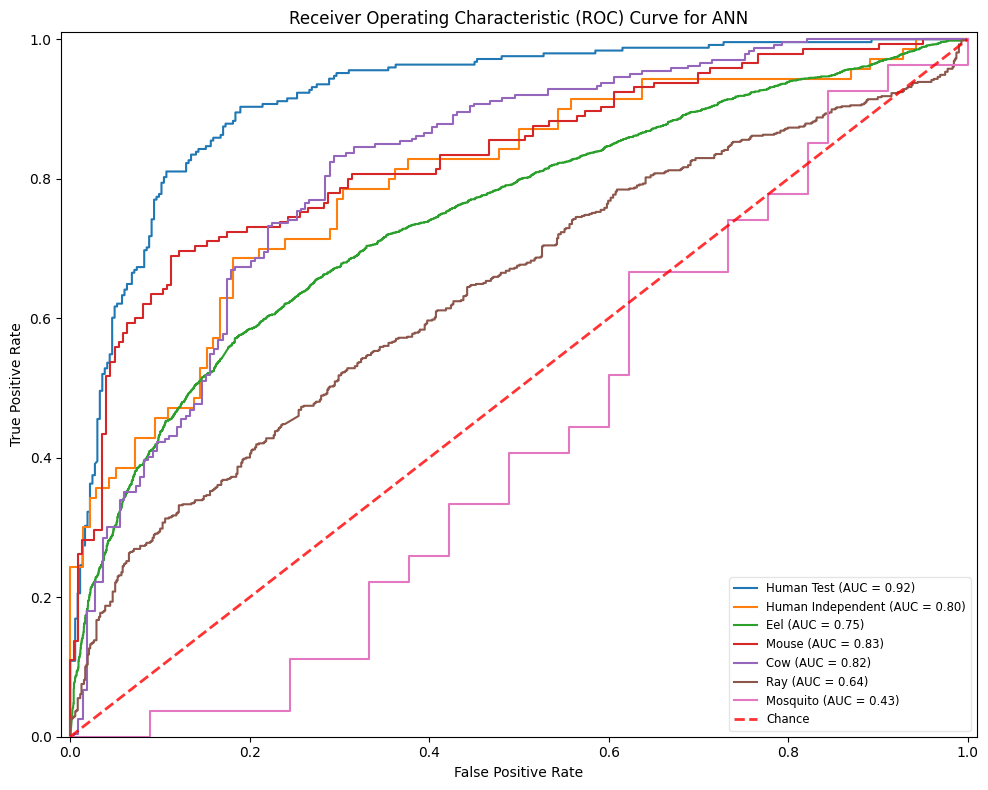

Evaluating dataset: Human Test
Evaluating model: CNN
20/20 [==============================] - 0s 4ms/step
Confusion Matrix - CNN:
[305  59]
[ 54 194]
Model: CNN
Accuracy: 0.815359477124183
Precision: 0.766798418972332
Recall: 0.782258064516129
F1 Score: 0.7744510978043911
ROC-AUC Score: 0.8871909340659341
Cohen's Kappa Score: 0.6181842273801375
MCC Score: 0.6182724686515112

Evaluating dataset: Human Independent
Evaluating model: CNN
7/7 [==============================] - 0s 33ms/step
Confusion Matrix - CNN:
[72 66]
[16 54]
Model: CNN
Accuracy: 0.6057692307692307
Precision: 0.45
Recall: 0.7714285714285715
F1 Score: 0.5684210526315789
ROC-AUC Score: 0.6578674948240166
Cohen's Kappa Score: 0.24929577464788732
MCC Score: 0.2803965893478369

Evaluating dataset: Eel
Evaluating model: CNN
171/171 [==============================] - 1s 5ms/step
Confusion Matrix - CNN:
[2194 1181]
[ 818 1266]
Model: CNN
Accuracy: 0.6338157171643158
Precision: 0.5173682059664896
Recall: 0.6074856046065259
F1 Sco

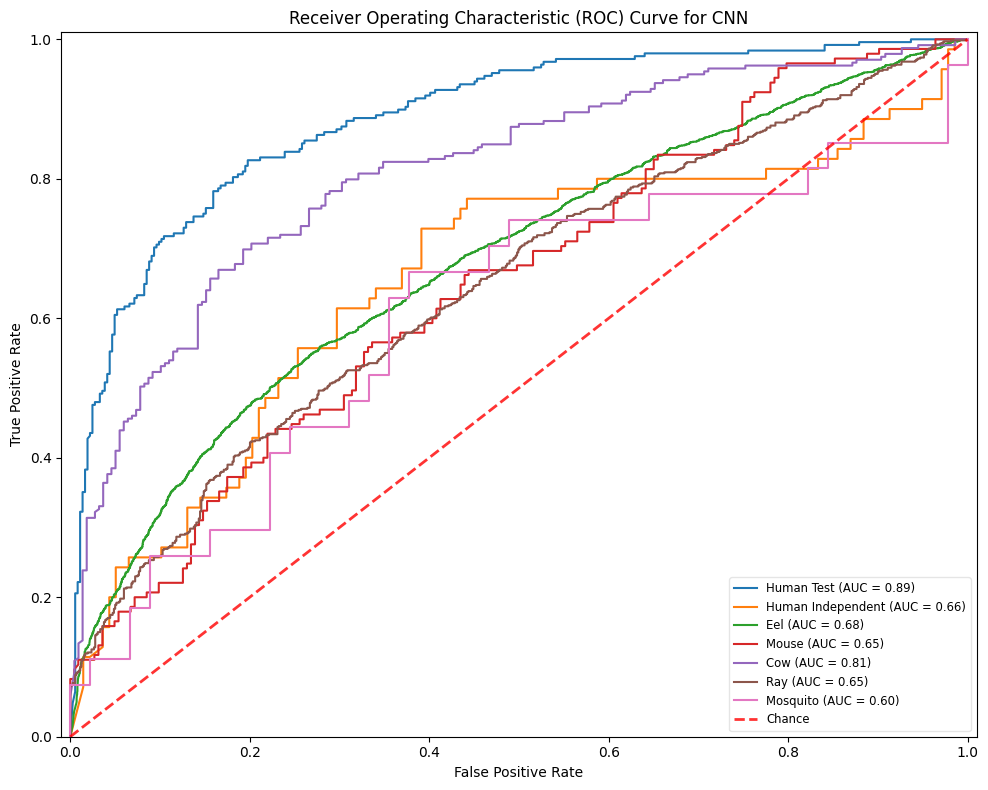

Evaluating dataset: Human Test
Evaluating model: LSTM
20/20 [==============================] - 0s 10ms/step
Confusion Matrix - LSTM:
[284  80]
[ 56 192]
Model: LSTM
Accuracy: 0.7777777777777778
Precision: 0.7058823529411765
Recall: 0.7741935483870968
F1 Score: 0.7384615384615385
ROC-AUC Score: 0.8433678216944345
Cohen's Kappa Score: 0.5459940652818991
MCC Score: 0.5477549163837283

Evaluating dataset: Human Independent
Evaluating model: LSTM
7/7 [==============================] - 0s 10ms/step
Confusion Matrix - LSTM:
[95 43]
[20 50]
Model: LSTM
Accuracy: 0.6971153846153846
Precision: 0.5376344086021505
Recall: 0.7142857142857143
F1 Score: 0.6134969325153373
ROC-AUC Score: 0.7453416149068324
Cohen's Kappa Score: 0.37253399731852144
MCC Score: 0.3827107344268534

Evaluating dataset: Eel
Evaluating model: LSTM
171/171 [==============================] - 1s 8ms/step
Confusion Matrix - LSTM:
[2418  957]
[ 988 1096]
Model: LSTM
Accuracy: 0.6437076387616779
Precision: 0.5338528981977594
Recall

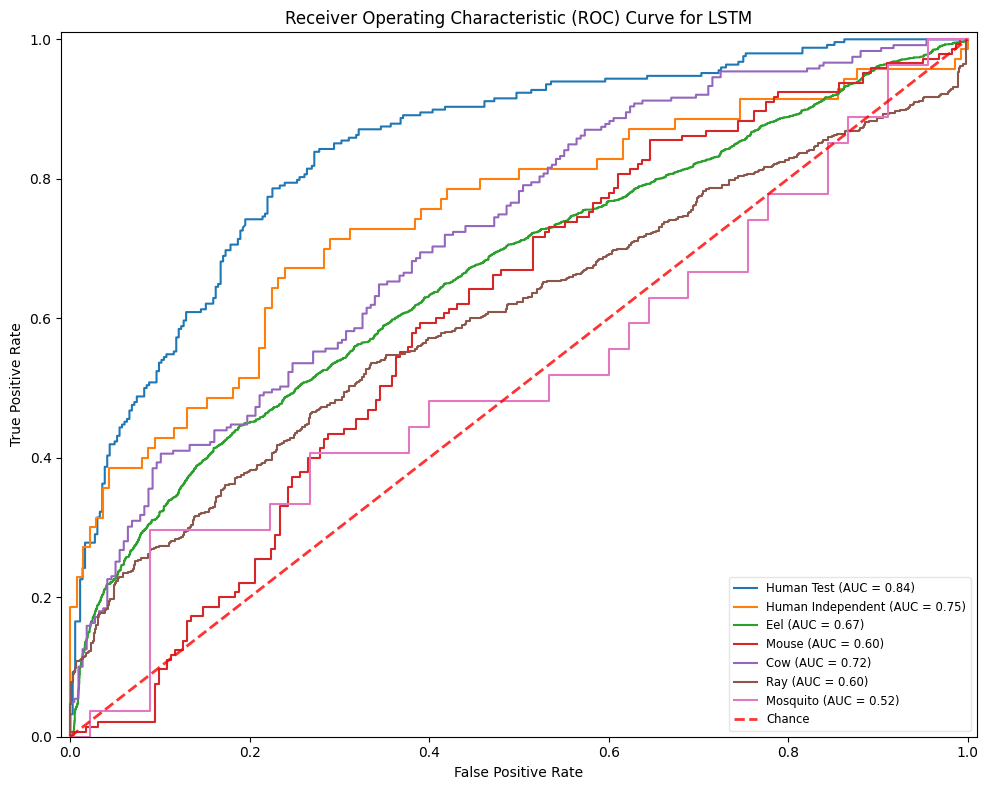

Evaluating dataset: Human Test
Evaluating model: GRU
20/20 [==============================] - 0s 9ms/step
Confusion Matrix - GRU:
[266  98]
[ 57 191]
Model: GRU
Accuracy: 0.7467320261437909
Precision: 0.6608996539792388
Recall: 0.7701612903225806
F1 Score: 0.7113594040968343
ROC-AUC Score: 0.8187754785537044
Cohen's Kappa Score: 0.48807339449541287
MCC Score: 0.49261070261935397

Evaluating dataset: Human Independent
Evaluating model: GRU
7/7 [==============================] - 0s 8ms/step
Confusion Matrix - GRU:
[96 42]
[21 49]
Model: GRU
Accuracy: 0.6971153846153846
Precision: 0.5384615384615384
Recall: 0.7
F1 Score: 0.608695652173913
ROC-AUC Score: 0.7376293995859212
Cohen's Kappa Score: 0.368421052631579
MCC Score: 0.3768673314407158

Evaluating dataset: Eel
Evaluating model: GRU
171/171 [==============================] - 2s 9ms/step
Confusion Matrix - GRU:
[2237 1138]
[1013 1071]
Model: GRU
Accuracy: 0.6059717897050741
Precision: 0.4848347668628339
Recall: 0.513915547024952
F1 Scor

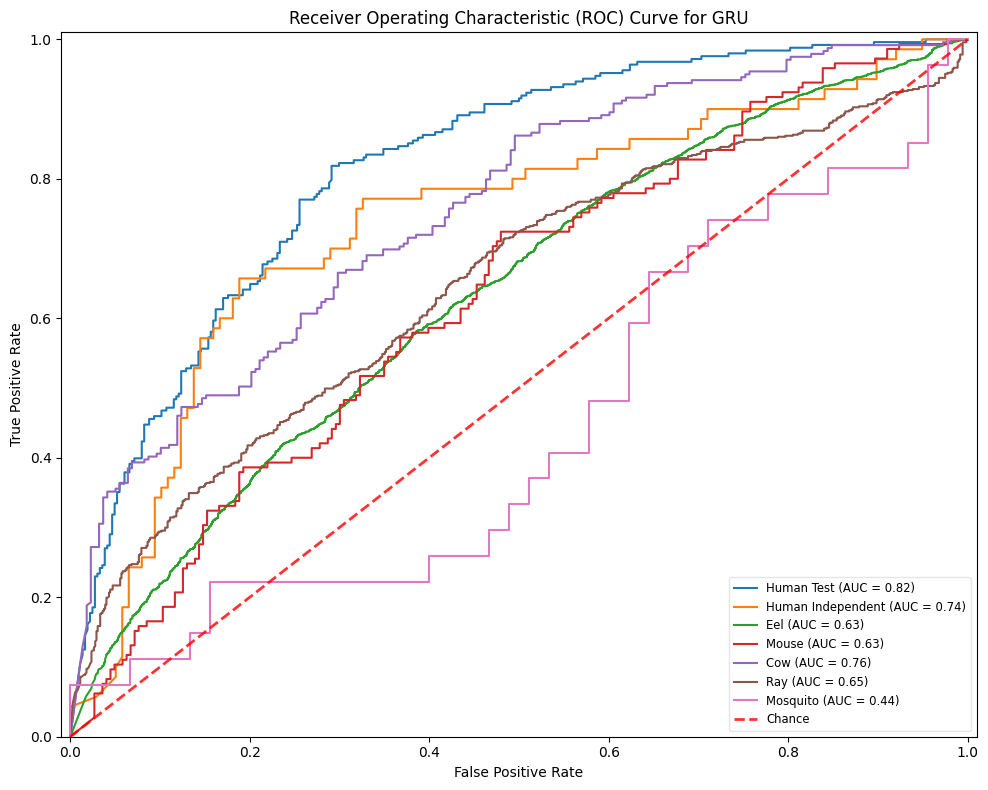

Evaluating dataset: Human Test
Evaluating model: Bi-LSTM
20/20 [==============================] - 0s 22ms/step
Confusion Matrix - Bi-LSTM:
[287  77]
[ 51 197]
Model: Bi-LSTM
Accuracy: 0.7908496732026143
Precision: 0.718978102189781
Recall: 0.7943548387096774
F1 Score: 0.7547892720306512
ROC-AUC Score: 0.8641439205955335
Cohen's Kappa Score: 0.5732403573763347
MCC Score: 0.5754063464765942

Evaluating dataset: Human Independent
Evaluating model: Bi-LSTM
7/7 [==============================] - 0s 20ms/step
Confusion Matrix - Bi-LSTM:
[89 49]
[51 19]
Model: Bi-LSTM
Accuracy: 0.5192307692307693
Precision: 0.27941176470588236
Recall: 0.2714285714285714
F1 Score: 0.27536231884057966
ROC-AUC Score: 0.4604037267080745
Cohen's Kappa Score: -0.08423686405337794
MCC Score: -0.08425667629978881

Evaluating dataset: Eel
Evaluating model: Bi-LSTM
171/171 [==============================] - 3s 20ms/step
Confusion Matrix - Bi-LSTM:
[2314 1061]
[ 896 1188]
Model: Bi-LSTM
Accuracy: 0.6415094339622641
Prec

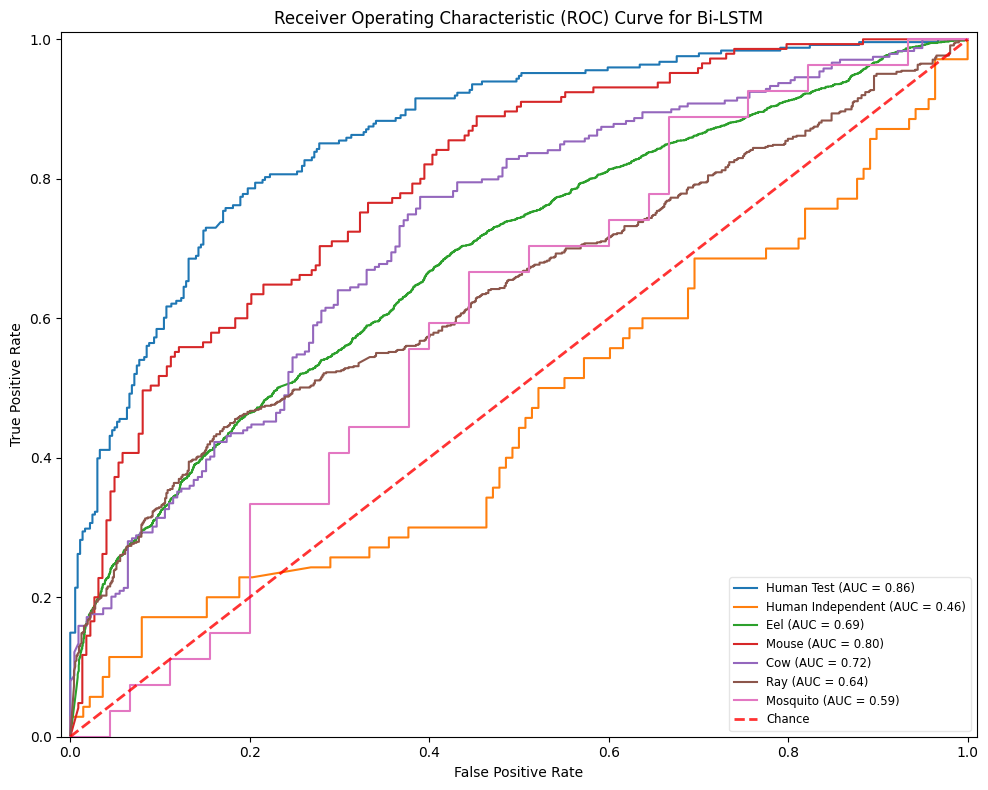

                                                                 ANN  \
Human Test         {'Accuracy': 0.8431372549019608, 'Precision': ...   
Human Independent  {'Accuracy': 0.7259615384615384, 'Precision': ...   
Eel                {'Accuracy': 0.7050741894119802, 'Precision': ...   
Mouse              {'Accuracy': 0.7418478260869565, 'Precision': ...   
Cow                {'Accuracy': 0.75054704595186, 'Precision': 0....   
Ray                {'Accuracy': 0.6081081081081081, 'Precision': ...   
Mosquito           {'Accuracy': 0.5, 'Precision': 0.2857142857142...   

                                                                 CNN  \
Human Test         {'Accuracy': 0.815359477124183, 'Precision': 0...   
Human Independent  {'Accuracy': 0.6057692307692307, 'Precision': ...   
Eel                {'Accuracy': 0.6338157171643158, 'Precision': ...   
Mouse              {'Accuracy': 0.595108695652174, 'Precision': 0...   
Cow                {'Accuracy': 0.7417943107221007, 'Precision'

/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef

# Define a function to print the confusion matrix as text
def print_confusion_matrix(confusion, model_name):
    print(f"Confusion Matrix - {model_name}:")
    for row in confusion:
        print(row)

# Define a function to plot ROC AUC curve
def plot_roc_auc(y_true, y_score, model_name, dataset_name):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{dataset_name} (AUC = {roc_auc:.2f})')

# Assuming you have a dictionary of datasets
datasets = {
    'Human Test': test_df,
    'Human Independent': df_humanIndependent_optimized_final,
    'Eel': df_eel_optimized_final,
    'Mouse': df_mouse_optimized_final,
    'Cow': df_cow_optimized_final,
    'Ray': df_ray_optimized_final,
    'Mosquito': df_mosquito_optimized_final
}

models = {
    'ANN': ann_model,
    'CNN': cnn_model,
    'LSTM': lstm_model,
    'GRU': gru_model,
    'Bi-LSTM': bi_lstm_model
}

# Evaluate and store results for all datasets
all_results = {}
confusion_matrices = {}

for model_name in models.keys():
    plt.figure(figsize=(10, 8))

    for dataset_name, dataset in datasets.items():
        print(f"Evaluating dataset: {dataset_name}")

        # Use StandardScaler to scale your features
        scaler = StandardScaler()
        X = scaler.fit_transform(dataset.loc[:, 2:])
        y = dataset['single-class-label']

        print(f"Evaluating model: {model_name}")

        # Reshape input data for RNN models
        if 'LSTM' in model_name or 'GRU' in model_name:
            X_rnn = X.reshape(X.shape[0], X.shape[1], 1)
        else:
            X_rnn = X

        model = models[model_name]
        y_pred_prob = model.predict(X_rnn)
        y_pred = np.argmax(y_pred_prob, axis=1)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_pred_prob[:, 1])
        cohen_kappa = cohen_kappa_score(y, y_pred)
        mcc = matthews_corrcoef(y, y_pred)

        # Calculate the confusion matrix
        confusion = confusion_matrix(y, y_pred)

        # Store confusion matrix
        confusion_matrices[(dataset_name, model_name)] = confusion

        # Print the confusion matrix as text
        print_confusion_matrix(confusion, model_name)

        # Print evaluation metrics
        print(f"Model: {model_name}")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
        print("ROC-AUC Score:", roc_auc)
        print("Cohen's Kappa Score:", cohen_kappa)
        print("MCC Score:", mcc)
        print()

        # Plot ROC-AUC curve
        plot_roc_auc(y, y_pred_prob[:, 1], model_name, dataset_name)

        # Store results
        if model_name not in all_results:
            all_results[model_name] = {}
        all_results[model_name][dataset_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC-AUC': roc_auc,
            'Cohen\'s Kappa': cohen_kappa,
            'MCC': mcc
        }

    # Plot settings
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    plt.xlim([-0.01, 1.01])
    plt.ylim([0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
    plt.legend(loc="lower right", fontsize='small', fancybox=True, framealpha=0.5)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(f'roc_auc_curve_{model_name}.png')
    plt.show()
    plt.close()

# Create a Pandas DataFrame from the results
results_df = pd.DataFrame(all_results)
print(results_df)

# Save results to Excel
results_df.to_excel('deep_learning_evaluation_results.xlsx', index=True)

# Save confusion matrices to a separate Excel file
with pd.ExcelWriter('confusion_matrices.xlsx') as writer:
    for (dataset_name, model_name), confusion_matrix in confusion_matrices.items():
        df_confusion = pd.DataFrame(confusion_matrix)
        df_confusion.to_excel(writer, sheet_name=f'{dataset_name}_{model_name}_confusion_matrix', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef

datasets = {
    'Human Test': test_df,
    'Human Independent': df_humanIndependent_optimized_final,
    'Eel': df_eel_optimized_final,
    'Mouse': df_mouse_optimized_final,
    'Cow': df_cow_optimized_final,
    'Ray': df_ray_optimized_final,
    'Mosquito': df_mosquito_optimized_final
}

models = {
    'ANN': ann_model,
    'CNN': cnn_model,
    'LSTM': lstm_model,
    'GRU': gru_model,
    'Bi-LSTM': bi_lstm_model
}

# Evaluate and store results for all datasets
for model_name, model in models.items():
    model_results = {}
    for dataset_name, dataset in datasets.items():
        print(f"Evaluating dataset: {dataset_name}")
        scaler = StandardScaler()
        X = scaler.fit_transform(dataset.loc[:, 2:])
        y = dataset['single-class-label']

        print(f"Evaluating model: {model_name}")
        # Reshape input data for RNN models
        if 'LSTM' in model_name or 'GRU' in model_name:
            X_rnn = X.reshape(X.shape[0], X.shape[1], 1)
        else:
            X_rnn = X

        y_pred_prob = model.predict(X_rnn)
        y_pred = np.argmax(y_pred_prob, axis=1)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_pred_prob[:, 1])
        cohen_kappa = cohen_kappa_score(y, y_pred)
        mcc = matthews_corrcoef(y, y_pred)

        # Store results
        model_results[dataset_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC-AUC': roc_auc,
            'Cohen\'s Kappa': cohen_kappa,
            'MCC': mcc
        }

    # Create a Pandas DataFrame from the results
    results_df = pd.DataFrame(model_results)

    # Save results to Excel
    results_df.to_excel(f'{model_name}_evaluation_results.xlsx', index=True)


In [ ]:
models = {
    'ANN': ann_model,
    'CNN': cnn_model,
    'LSTM': lstm_model,
    'GRU': gru_model,
    'Bi-LSTM': bi_lstm_model
}

# Evaluate and store results for all datasets
for model_name, model in models.items():
  model.save(f'{model_name}_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Referenes
*  Muthukrishnan, R., & Rohini, R. (2016). LASSO: A feature selection technique in predictive modeling for machine learning. 2016 IEEE International Conference on Advances in Computer Applications (ICACA), 18–20. https://doi.org/10.1109/ICACA.2016.7887916
*  Moriwaki, H., Tian, Y.-S., Kawashita, N., & Takagi, T. (2018). Mordred: A molecular descriptor calculator. Journal of Cheminformatics, 10(1), 4.
*   Vignaux, P. A., Lane, T. R., Urbina, F., Gerlach, J., Puhl, A. C., Snyder, S. H., & Ekins, S. (2023). Validation of Acetylcholinesterase Inhibition Machine Learning Models for Multiple Species. Chemical Research in Toxicology, 36(2), 188–201. https://doi.org/10.1021/acs.chemrestox.2c00283